In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline

df_acc = pd.read_csv('/Users/angelxue/Documents/Clyde/Mangement Sci Project/Code/accounts.csv')
df_alt = pd.read_csv('/Users/angelxue/Documents/Clyde/Mangement Sci Project/Code/alerts.csv')
df_trct = pd.read_csv('/Users/angelxue/Documents/Clyde/Mangement Sci Project/Code/transactions.csv')

In [2]:
df_acc.head(10)

,ACCOUNT_ID,CUSTOMER_ID,INIT_BALANCE,COUNTRY,ACCOUNT_TYPE,IS_FRAUD,TX_BEHAVIOR_ID
0,0,C_0,184.44,US,I,False,1
1,1,C_1,175.80,US,I,False,1
2,2,C_2,142.06,US,I,False,1
3,3,C_3,125.89,US,I,False,1
4,4,C_4,151.13,US,I,False,1
5,5,C_5,140.49,US,I,False,1
6,6,C_6,178.38,US,I,False,1
7,7,C_7,130.33,US,I,False,1
8,8,C_8,147.66,US,I,False,1
9,9,C_9,158.34,US,I,False,1


In [283]:
df_trct_sorted = df_trct.sort_values(by='TIMESTAMP')

# Get the first incoming transaction for each account
first_in_transactions = df_trct_sorted.groupby('RECEIVER_ACCOUNT_ID').first().reset_index()

# Get the first outgoing transaction for each account
first_out_transactions = df_trct_sorted.groupby('SENDER_ACCOUNT_ID').first().reset_index()

# Merge first transactions with account initial balances
merged_in_df = pd.merge(df_acc, first_in_transactions, left_on='ACCOUNT_ID', right_on='RECEIVER_ACCOUNT_ID', how='inner', suffixes=('', '_IN'))
merged_out_df = pd.merge(df_acc, first_out_transactions, left_on='ACCOUNT_ID', right_on='SENDER_ACCOUNT_ID', how='inner', suffixes=('', '_OUT'))

# Check if the initial balance equals the first incoming or outgoing transaction amount
merged_in_df['Initial_Equal_First_Tx_IN'] = merged_in_df['INIT_BALANCE'] == merged_in_df['TX_AMOUNT']
merged_out_df['Initial_Equal_First_Tx_OUT'] = merged_out_df['INIT_BALANCE'] == merged_out_df['TX_AMOUNT']

# Determine if all initial balances match the first transaction amounts
all_match_in = merged_in_df['Initial_Equal_First_Tx_IN'].all()
all_match_out = merged_out_df['Initial_Equal_First_Tx_OUT'].all()

# Print results
print("All INIT_BALANCE match the first incoming TX_AMOUNT:", all_match_in)
print("All INIT_BALANCE match the first outgoing TX_AMOUNT:", all_match_out)

# Display the detailed results
print("\nIncoming Transactions Comparison:")
print(merged_in_df[['ACCOUNT_ID', 'INIT_BALANCE', 'TX_AMOUNT', 'Initial_Equal_First_Tx_IN']])

print("\nOutgoing Transactions Comparison:")
print(merged_out_df[['ACCOUNT_ID', 'INIT_BALANCE', 'TX_AMOUNT', 'Initial_Equal_First_Tx_OUT']])


All INIT_BALANCE match the first incoming TX_AMOUNT: False
All INIT_BALANCE match the first outgoing TX_AMOUNT: False

Incoming Transactions Comparison:
      ACCOUNT_ID  INIT_BALANCE  TX_AMOUNT  Initial_Equal_First_Tx_IN
0              3        125.89      13.63                      False
1              5        140.49       8.25                      False
2              6        178.38     191.19                      False
3              7        130.33     140.83                      False
4              9        158.34    7011.63                      False
...          ...           ...        ...                        ...
9909        9995        394.35      19.35                      False
9910        9996        344.98       6.23                      False
9911        9997        260.85     134.86                      False
9912        9998        323.79     533.29                      False
9913        9999        317.65     165.66                      False

[9914 rows x 4 col

In [287]:
df_acc[df_acc['ACCOUNT_ID'] == 9989]

,ACCOUNT_ID,INIT_BALANCE,IS_FRAUD,TX_BEHAVIOR_ID
9989,9989,252.35,True,5


In [289]:
df_acc[df_acc['IS_FRAUD'] == True]

,ACCOUNT_ID,INIT_BALANCE,IS_FRAUD,TX_BEHAVIOR_ID
49,49,196.75,True,1
67,67,138.49,True,1
86,86,181.16,True,1
91,91,157.97,True,1
113,113,157.39,True,1
...,...,...,...,...
9995,9995,394.35,True,5
9996,9996,344.98,True,5
9997,9997,260.85,True,5
9998,9998,323.79,True,5


In [4]:
df_acc.sort_values(by='INIT_BALANCE')

,ACCOUNT_ID,CUSTOMER_ID,INIT_BALANCE,COUNTRY,ACCOUNT_TYPE,IS_FRAUD,TX_BEHAVIOR_ID
5755,5755,C_5755,100.00,US,I,False,4
2607,2607,C_2607,100.01,US,I,True,4
6719,6719,C_6719,100.06,US,I,False,4
40,40,C_40,100.11,US,I,False,1
8123,8123,C_8123,100.13,US,I,False,1
...,...,...,...,...,...,...,...
3549,3549,C_3549,599.13,US,I,False,3
5452,5452,C_5452,599.32,US,I,True,3
9535,9535,C_9535,599.44,US,I,False,3
9466,9466,C_9466,599.57,US,I,True,3


In [129]:
df_trct

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID
0,1,6456,9069,TRANSFER,465.05,0,False,-1
1,2,7516,9543,TRANSFER,564.64,0,False,-1
2,3,2445,9356,TRANSFER,598.94,0,False,-1
3,4,2576,4617,TRANSFER,466.07,0,False,-1
4,5,3524,1773,TRANSFER,405.63,0,False,-1
...,...,...,...,...,...,...,...,...
1048570,1048571,2503,6452,TRANSFER,413.57,158,False,-1
1048571,1048572,3726,9223,TRANSFER,198.53,158,False,-1
1048572,1048573,3726,1469,TRANSFER,198.53,158,False,-1
1048573,1048574,3726,3708,TRANSFER,198.53,158,False,-1


In [131]:
df_alt

,ALERT_ID,ALERT_TYPE,IS_FRAUD,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP
1365,0,fan_in,True,1077962,9810,9997,TRANSFER,4.20,163
1386,0,fan_in,True,1091057,9332,9997,TRANSFER,4.83,165
1404,0,fan_in,True,1106202,2962,9997,TRANSFER,4.80,167
1438,0,fan_in,True,1120547,8181,9997,TRANSFER,4.21,169
281,1,fan_in,True,229913,8387,3142,TRANSFER,4.02,35
...,...,...,...,...,...,...,...,...,...
1338,399,cycle,True,1055217,9084,9053,TRANSFER,13.63,159
1347,399,cycle,True,1062503,9053,5687,TRANSFER,13.63,160
1364,399,cycle,True,1077827,8680,8959,TRANSFER,13.63,163
1378,399,cycle,True,1086995,8959,9084,TRANSFER,13.63,164


In [5]:
df_trct[(df_trct['RECEIVER_ACCOUNT_ID'] == 9998) ].sort_values(by = 'TX_AMOUNT')

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID
244200,244201,9133,9998,TRANSFER,5.15,37,False,-1
838649,838650,9133,9998,TRANSFER,5.15,127,False,-1
90571,90572,9133,9998,TRANSFER,5.15,14,False,-1
577414,577415,9133,9998,TRANSFER,5.15,87,False,-1
561221,561222,9133,9998,TRANSFER,5.15,85,False,-1
...,...,...,...,...,...,...,...,...
882376,882377,1202,9998,TRANSFER,6998412.00,133,False,-1
987847,987848,251,9998,TRANSFER,7633014.50,149,False,-1
989108,989109,8319,9998,TRANSFER,9437383.00,149,False,-1
1006667,1006668,5251,9998,TRANSFER,12000000.00,152,False,-1


In [6]:
df_trct[(df_trct['SENDER_ACCOUNT_ID'] == 9998) | (df_trct['RECEIVER_ACCOUNT_ID'] == 9998)]

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID
21,22,6613,9998,TRANSFER,162.30,0,False,-1
369,370,5148,9998,TRANSFER,12.88,0,False,-1
589,590,658,9998,TRANSFER,106.65,0,False,-1
954,955,7003,9998,TRANSFER,16.42,0,False,-1
1327,1328,7652,9998,TRANSFER,150.21,0,False,-1
...,...,...,...,...,...,...,...,...
1046796,1046797,1514,9998,TRANSFER,477.73,158,False,-1
1047120,1047121,7108,9998,TRANSFER,14.78,158,False,-1
1047387,1047388,6708,9998,TRANSFER,165.16,158,False,-1
1047933,1047934,471,9998,TRANSFER,533.29,158,False,-1


In [7]:
def getBalance(account_id, list):
    # Get the initial balance of the account from the account table
    initial_balance = df_acc.loc[df_acc['ACCOUNT_ID'] == account_id, 'INIT_BALANCE'].values[0]
    
    # Filter transactions where the account is either the sender or the receiver
    filtered_df = df_trct[(df_trct['SENDER_ACCOUNT_ID'] == account_id) | (df_trct['RECEIVER_ACCOUNT_ID'] == account_id)]
    
    # # Calculate the balance
    # balance = initial_balance
    debit = 0
    credit = 0
    # Iterate over the filtered transactions to adjust the balance
    for _, row in filtered_df.iterrows():
        if row['SENDER_ACCOUNT_ID'] == account_id:
            debit += row['TX_AMOUNT']
        if row['RECEIVER_ACCOUNT_ID'] == account_id:
            credit += row['TX_AMOUNT']
    
    # Display the balance
    # print("Account ID:", account_id)
    # print("Initial Balance:", initial_balance)
    # print("Final Balance:", balance)
    list.append({
    'ACCOUNT_ID': account_id,
    'INIT_BALANCE': initial_balance,
    'DEBIT': debit,
    'CREDIT': credit,
    'FINAL_BALANCE': credit - debit,
    'TOTAL_TXN_AMOUNT': credit + debit
    })

In [8]:
list = []
for account_id in df_acc['ACCOUNT_ID']:
    getBalance(account_id, list)
account_balance = pd.DataFrame(list)
# Format the dataframe using style.format
pd.options.display.float_format = '{:.2f}'.format
account_balance.sort_values(by='FINAL_BALANCE')

,ACCOUNT_ID,INIT_BALANCE,DEBIT,CREDIT,FINAL_BALANCE,TOTAL_TXN_AMOUNT
3283,3283,380.79,112324401.32,4326661.66,-107997739.66,116651062.98
4224,4224,332.80,94158064.26,0.00,-94158064.26,94158064.26
2294,2294,245.20,91193747.35,841270.96,-90352476.39,92035018.31
5263,5263,308.82,89525451.00,188063.27,-89337387.73,89713514.27
1213,1213,329.60,81575884.41,2697.04,-81573187.37,81578581.45
...,...,...,...,...,...,...
9989,9989,252.35,49986.18,67827345.33,67777359.15,67877331.51
9995,9995,394.35,69408.98,73185307.81,73115898.83,73254716.79
9999,9999,317.65,80074.75,87451815.37,87371740.62,87531890.12
9996,9996,344.98,78678.94,95373078.08,95294399.14,95451757.02


In [9]:
account_balance['SUSPICIOUS_ACCOUNT'] = account_balance['ACCOUNT_ID'].map(df_acc.set_index('ACCOUNT_ID')['IS_FRAUD'])
account_balance

,ACCOUNT_ID,INIT_BALANCE,DEBIT,CREDIT,FINAL_BALANCE,TOTAL_TXN_AMOUNT,SUSPICIOUS_ACCOUNT
0,0,184.44,0.00,0.00,0.00,0.00,False
1,1,175.80,2988.60,0.00,-2988.60,2988.60,False
2,2,142.06,1846.65,0.00,-1846.65,1846.65,False
3,3,125.89,1510.56,245.34,-1265.22,1755.90,False
4,4,151.13,2266.95,0.00,-2266.95,2266.95,False
...,...,...,...,...,...,...,...
9995,9995,394.35,69408.98,73185307.81,73115898.83,73254716.79,True
9996,9996,344.98,78678.94,95373078.08,95294399.14,95451757.02,True
9997,9997,260.85,34436.49,58187284.25,58152847.76,58221720.74,True
9998,9998,323.79,97156.61,105261258.47,105164101.86,105358415.08,True


In [10]:
# Filter the data to include only suspicious accounts
suspicious_accounts = account_balance[account_balance['SUSPICIOUS_ACCOUNT'] == True]
suspicious_accounts = suspicious_accounts.sort_values(by = 'TOTAL_TXN_AMOUNT')
suspicious_accounts

,ACCOUNT_ID,INIT_BALANCE,DEBIT,CREDIT,FINAL_BALANCE,TOTAL_TXN_AMOUNT,SUSPICIOUS_ACCOUNT
67,67,138.49,1526.36,123.75,-1402.61,1650.11,True
1150,1150,115.94,1975.42,340.24,-1635.18,2315.66,True
49,49,196.75,3348.79,0.00,-3348.79,3348.79,True
153,153,167.62,3522.66,0.00,-3522.66,3522.66,True
2014,2014,103.14,1653.79,1978.12,324.33,3631.91,True
...,...,...,...,...,...,...,...
9999,9999,317.65,80074.75,87451815.37,87371740.62,87531890.12,True
5263,5263,308.82,89525451.00,188063.27,-89337387.73,89713514.27,True
9996,9996,344.98,78678.94,95373078.08,95294399.14,95451757.02,True
344,344,281.18,91234080.51,9774705.91,-81459374.60,101008786.42,True


In [11]:
suspicious_accounts['TOTAL_TXN_AMOUNT'].describe()

count        1685.00
mean      8254265.27
std      11589995.23
min          1650.11
25%        601401.97
50%       3946891.49
75%      11497785.53
max     105358415.08
Name: TOTAL_TXN_AMOUNT, dtype: float64

In [12]:
suspicious_accounts[suspicious_accounts['TOTAL_TXN_AMOUNT']<2000]

,ACCOUNT_ID,INIT_BALANCE,DEBIT,CREDIT,FINAL_BALANCE,TOTAL_TXN_AMOUNT,SUSPICIOUS_ACCOUNT
67,67,138.49,1526.36,123.75,-1402.61,1650.11,True


In [13]:
suspicious_accounts[(suspicious_accounts['TOTAL_TXN_AMOUNT']>500000) & (suspicious_accounts['TOTAL_TXN_AMOUNT'] < 1000000)]

,ACCOUNT_ID,INIT_BALANCE,DEBIT,CREDIT,FINAL_BALANCE,TOTAL_TXN_AMOUNT,SUSPICIOUS_ACCOUNT
741,741,136.87,10267.89,498955.65,488687.76,509223.54,True
5071,5071,164.38,1818.82,514608.80,512789.98,516427.62,True
2993,2993,294.98,5313.96,513786.51,508472.55,519100.47,True
8816,8816,258.55,3105.78,516676.97,513571.19,519782.75,True
7490,7490,591.53,83405.73,441339.48,357933.75,524745.21,True
...,...,...,...,...,...,...,...
4526,4526,487.03,69170.26,909616.19,840445.93,978786.45,True
1983,1983,203.30,3671.96,977886.48,974214.52,981558.44,True
6695,6695,193.97,37252.77,945551.76,908298.99,982804.53,True
3473,3473,563.27,80562.63,902387.27,821824.64,982949.90,True


In [14]:
df_alt.head()

,ALERT_ID,ALERT_TYPE,IS_FRAUD,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP
0,193,fan_in,True,82,6976,9739,TRANSFER,4.85,0
1,377,cycle,True,949,5776,2570,TRANSFER,10.27,0
2,189,fan_in,True,6280,9999,9530,TRANSFER,2.74,1
3,377,cycle,True,7999,1089,7352,TRANSFER,10.27,1
4,130,fan_in,True,12975,7025,9708,TRANSFER,3.53,2


In [15]:
df_trct.head()

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID
0,1,6456,9069,TRANSFER,465.05,0,False,-1
1,2,7516,9543,TRANSFER,564.64,0,False,-1
2,3,2445,9356,TRANSFER,598.94,0,False,-1
3,4,2576,4617,TRANSFER,466.07,0,False,-1
4,5,3524,1773,TRANSFER,405.63,0,False,-1


In [16]:
df_acc.info

<bound method DataFrame.info of       ACCOUNT_ID CUSTOMER_ID  INIT_BALANCE COUNTRY ACCOUNT_TYPE  IS_FRAUD  \
0              0         C_0        184.44      US            I     False   
1              1         C_1        175.80      US            I     False   
2              2         C_2        142.06      US            I     False   
3              3         C_3        125.89      US            I     False   
4              4         C_4        151.13      US            I     False   
...          ...         ...           ...     ...          ...       ...   
9995        9995      C_9995        394.35      US            I      True   
9996        9996      C_9996        344.98      US            I      True   
9997        9997      C_9997        260.85      US            I      True   
9998        9998      C_9998        323.79      US            I      True   
9999        9999      C_9999        317.65      US            I      True   

      TX_BEHAVIOR_ID  
0                  1

In [17]:
# Find the set of unique values in the TX_BEHAVIOR_ID column
unique_tx_behavior_ids = df_acc['TX_BEHAVIOR_ID'].unique()

# Convert the array of unique values to a set
unique_tx_behavior_ids_set = set(unique_tx_behavior_ids)

# Display the set of unique TX_BEHAVIOR_ID values
print(unique_tx_behavior_ids_set)

{1, 2, 3, 4, 5}


In [18]:
# Find the set of unique values in the TX_BEHAVIOR_ID column
unique_acc_type = df_acc['COUNTRY'].unique()

# Convert the array of unique values to a set
unique_acc_type_set = set(unique_acc_type)

# Display the set of unique TX_BEHAVIOR_ID values
print(unique_acc_type)

['US']


In [19]:
# Find the set of unique values in the TX_BEHAVIOR_ID column
unique_acc_type = df_acc['ACCOUNT_TYPE'].unique()

# Convert the array of unique values to a set
unique_acc_type_set = set(unique_acc_type)

# Display the set of unique TX_BEHAVIOR_ID values
print(unique_acc_type)

['I']


In [20]:
# acc dataframe elimated the unuseful columns
df_acc = df_acc.drop(columns=['CUSTOMER_ID','COUNTRY','ACCOUNT_TYPE'])
df_acc

,ACCOUNT_ID,INIT_BALANCE,IS_FRAUD,TX_BEHAVIOR_ID
0,0,184.44,False,1
1,1,175.80,False,1
2,2,142.06,False,1
3,3,125.89,False,1
4,4,151.13,False,1
...,...,...,...,...
9995,9995,394.35,True,5
9996,9996,344.98,True,5
9997,9997,260.85,True,5
9998,9998,323.79,True,5


In [21]:
df_acc_sort = df_acc.sort_values('INIT_BALANCE')

In [22]:
fraud_acc = df_acc[df_acc['IS_FRAUD']]
fraud_acc

,ACCOUNT_ID,INIT_BALANCE,IS_FRAUD,TX_BEHAVIOR_ID
49,49,196.75,True,1
67,67,138.49,True,1
86,86,181.16,True,1
91,91,157.97,True,1
113,113,157.39,True,1
...,...,...,...,...
9995,9995,394.35,True,5
9996,9996,344.98,True,5
9997,9997,260.85,True,5
9998,9998,323.79,True,5


In [24]:
df_alt.head()

,ALERT_ID,ALERT_TYPE,IS_FRAUD,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP
0,193,fan_in,True,82,6976,9739,TRANSFER,4.85,0
1,377,cycle,True,949,5776,2570,TRANSFER,10.27,0
2,189,fan_in,True,6280,9999,9530,TRANSFER,2.74,1
3,377,cycle,True,7999,1089,7352,TRANSFER,10.27,1
4,130,fan_in,True,12975,7025,9708,TRANSFER,3.53,2


In [25]:
## total row of alert is 17719
df_alt.info

<bound method DataFrame.info of       ALERT_ID ALERT_TYPE  IS_FRAUD    TX_ID  SENDER_ACCOUNT_ID  \
0          193     fan_in      True       82               6976   
1          377      cycle      True      949               5776   
2          189     fan_in      True     6280               9999   
3          377      cycle      True     7999               1089   
4          130     fan_in      True    12975               7025   
...        ...        ...       ...      ...                ...   
1714       272      cycle      True  1316271               2465   
1715        44     fan_in      True  1316636               1453   
1716       222      cycle      True  1317852               9446   
1717        74     fan_in      True  1322020               6969   
1718       294      cycle      True  1322711               8908   

      RECEIVER_ACCOUNT_ID   TX_TYPE  TX_AMOUNT  TIMESTAMP  
0                    9739  TRANSFER       4.85          0  
1                    2570  TRANSFER      10

In [26]:
df_alt = df_alt.sort_values(by=['ALERT_ID','TIMESTAMP'])
df_alt

,ALERT_ID,ALERT_TYPE,IS_FRAUD,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP
1365,0,fan_in,True,1077962,9810,9997,TRANSFER,4.20,163
1386,0,fan_in,True,1091057,9332,9997,TRANSFER,4.83,165
1404,0,fan_in,True,1106202,2962,9997,TRANSFER,4.80,167
1438,0,fan_in,True,1120547,8181,9997,TRANSFER,4.21,169
281,1,fan_in,True,229913,8387,3142,TRANSFER,4.02,35
...,...,...,...,...,...,...,...,...,...
1338,399,cycle,True,1055217,9084,9053,TRANSFER,13.63,159
1347,399,cycle,True,1062503,9053,5687,TRANSFER,13.63,160
1364,399,cycle,True,1077827,8680,8959,TRANSFER,13.63,163
1378,399,cycle,True,1086995,8959,9084,TRANSFER,13.63,164


In [ ]:
fraud_acc = df_trct[df_trct['IS_FRAUD']]
fraud_acc

In [27]:
alert_type = df_alt['ALERT_TYPE'].unique()
alert_type = set(alert_type)
alert_type

{'cycle', 'fan_in'}

In [28]:
##all alert is fraud detected
df_alt['IS_FRAUD'].sum()

1719

In [30]:
alert_counts = df_alt.groupby('ALERT_TYPE').size()
alert_counts

ALERT_TYPE
cycle     936
fan_in    783
dtype: int64

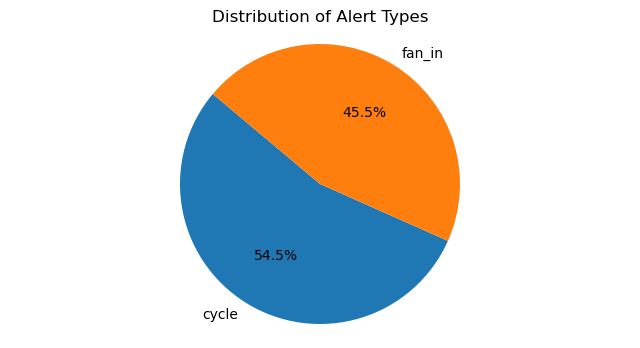

In [31]:
# Plot the pie chart
plt.figure(figsize=(8, 4))
plt.pie(alert_counts, labels=alert_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Alert Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [127]:
df_alt_fan_in = df_alt[df_alt['ALERT_TYPE'] == 'fan_in']
df_alt_fan_in

,ALERT_ID,ALERT_TYPE,IS_FRAUD,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP
1365,0,fan_in,True,1077962,9810,9997,TRANSFER,4.20,163
1386,0,fan_in,True,1091057,9332,9997,TRANSFER,4.83,165
1404,0,fan_in,True,1106202,2962,9997,TRANSFER,4.80,167
1438,0,fan_in,True,1120547,8181,9997,TRANSFER,4.21,169
281,1,fan_in,True,229913,8387,3142,TRANSFER,4.02,35
...,...,...,...,...,...,...,...,...,...
902,198,fan_in,True,686823,2279,7320,TRANSFER,4.50,104
1301,199,fan_in,True,1031420,8248,795,TRANSFER,3.26,156
1330,199,fan_in,True,1048698,7466,795,TRANSFER,2.91,158
1345,199,fan_in,True,1059316,8900,795,TRANSFER,3.34,160


In [33]:
df_alt[df_alt['ALERT_ID'] == 377]

,ALERT_ID,ALERT_TYPE,IS_FRAUD,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP
1,377,cycle,True,949,5776,2570,TRANSFER,10.27,0
3,377,cycle,True,7999,1089,7352,TRANSFER,10.27,1
28,377,cycle,True,37504,2570,8542,TRANSFER,10.27,6
66,377,cycle,True,59364,7352,5776,TRANSFER,10.27,9
67,377,cycle,True,59600,8542,1089,TRANSFER,10.27,9


In [34]:
df_trct[df_trct['TX_ID'].isin([949,7999,37504,59364,59600])]

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID
948,949,5776,2570,TRANSFER,10.27,0,True,377
7998,7999,1089,7352,TRANSFER,10.27,1,True,377
37503,37504,2570,8542,TRANSFER,10.27,6,True,377
59363,59364,7352,5776,TRANSFER,10.27,9,True,377
59599,59600,8542,1089,TRANSFER,10.27,9,True,377


In [35]:
df_alt_fan_in_grouped = df_alt_fan_in.groupby('ALERT_ID').agg(
    TRANSACTION_COUNT=pd.NamedAgg(column='TX_ID', aggfunc='size'),
    FRAUD_AMOUNT=pd.NamedAgg(column='TX_AMOUNT', aggfunc='sum')
).reset_index()
print(df_alt_fan_in_grouped)

     ALERT_ID  TRANSACTION_COUNT  FRAUD_AMOUNT
0           0                  4         18.04
1           1                  4         15.92
2           2                  4         14.02
3           3                  4         11.78
4           4                  4         13.40
..        ...                ...           ...
194       195                  4         14.51
195       196                  4         18.14
196       197                  4         17.10
197       198                  4         16.40
198       199                  4         12.36

[199 rows x 3 columns]


In [36]:
df_alt_fan_in_grouped['TRANSACTION_COUNT'].unique()

array([4, 3, 1, 2])

In [37]:
#exception that less 4 transactions contribute to the fraudulent transactions
df_alt_fan_in_grouped[df_alt_fan_in_grouped['TRANSACTION_COUNT'] < 4]

,ALERT_ID,TRANSACTION_COUNT,FRAUD_AMOUNT
21,21,3,9.41
44,44,1,2.81
53,53,2,7.66
86,86,3,9.56
143,144,2,7.50
163,164,3,12.30
175,176,3,9.52
182,183,3,11.49
192,193,3,14.55


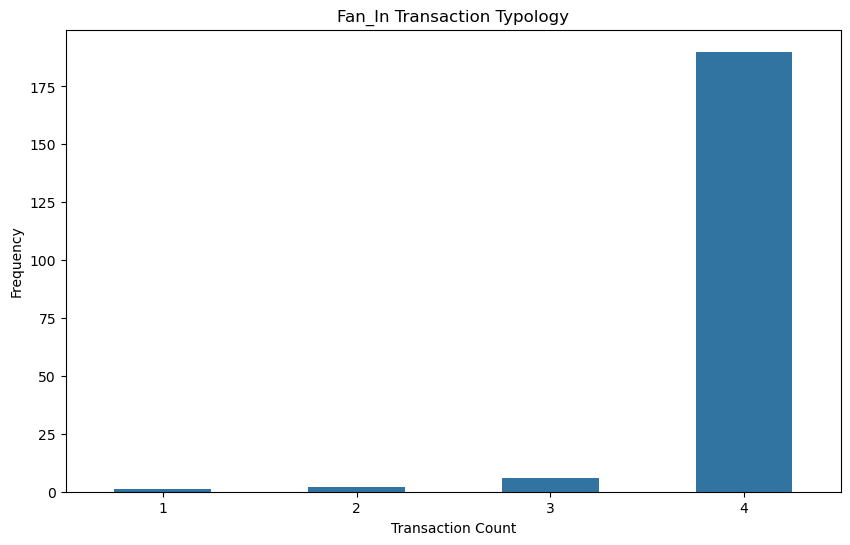

In [339]:
# Get the unique values of 'TRANSACTION_COUNT' and their frequencies
transaction_counts = df_alt_fan_in_grouped['TRANSACTION_COUNT'].value_counts().sort_index()

# Plot the unique values of 'TRANSACTION_COUNT' in a bar chart with thinner bars
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=transaction_counts.index, y=transaction_counts.values, width=0.5)
plt.title('Fan_In Transaction Typology')
plt.xlabel('Transaction Count')
plt.ylabel('Frequency')
plt.show()

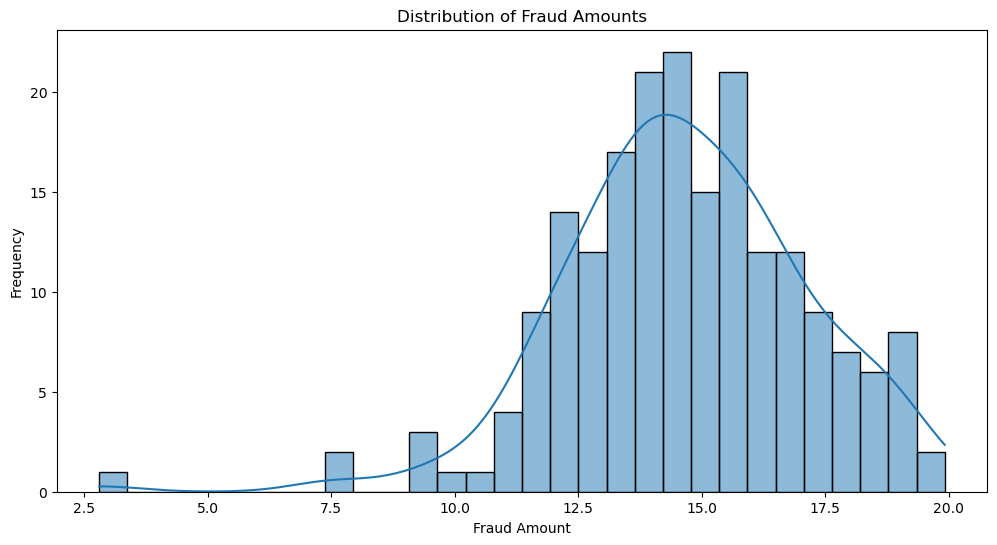

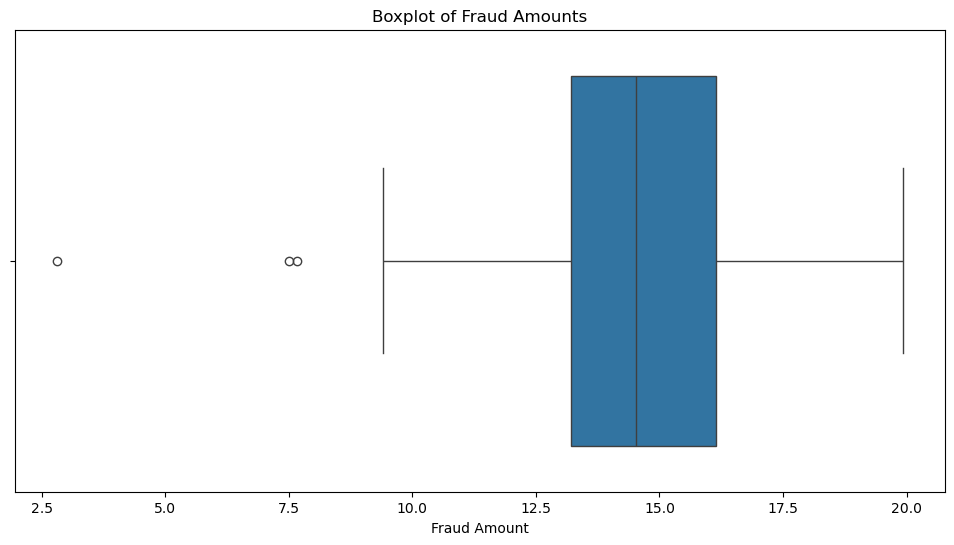

In [39]:
# Plot the distribution of 'FRAUD_AMOUNT' using a histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_alt_fan_in_grouped['FRAUD_AMOUNT'], bins=30, kde=True)
plt.title('Distribution of Fraud Amounts')
plt.xlabel('Fraud Amount')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of 'FRAUD_AMOUNT' using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_alt_fan_in_grouped['FRAUD_AMOUNT'])
plt.title('Boxplot of Fraud Amounts')
plt.xlabel('Fraud Amount')
plt.show()

In [40]:
df_alt_cycle = df_alt[df_alt['ALERT_TYPE'] == 'cycle']
df_alt_cycle

,ALERT_ID,ALERT_TYPE,IS_FRAUD,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP
810,200,cycle,True,593438,9721,9057,TRANSFER,17.17,90
820,200,cycle,True,600800,1670,9721,TRANSFER,17.17,91
837,200,cycle,True,610222,9057,9118,TRANSFER,17.17,92
863,200,cycle,True,631293,9118,9989,TRANSFER,17.17,96
871,200,cycle,True,640796,9989,1670,TRANSFER,17.17,97
...,...,...,...,...,...,...,...,...,...
1338,399,cycle,True,1055217,9084,9053,TRANSFER,13.63,159
1347,399,cycle,True,1062503,9053,5687,TRANSFER,13.63,160
1364,399,cycle,True,1077827,8680,8959,TRANSFER,13.63,163
1378,399,cycle,True,1086995,8959,9084,TRANSFER,13.63,164


In [41]:
grouped_tx_amounts = df_alt_cycle.groupby('ALERT_ID')['TX_AMOUNT'].first().reset_index()
print(grouped_tx_amounts)

     ALERT_ID  TX_AMOUNT
0         200      17.17
1         201      19.03
2         202      12.93
3         203      17.64
4         204      18.68
..        ...        ...
187       395      18.79
188       396      10.30
189       397      11.50
190       398      12.15
191       399      13.63

[192 rows x 2 columns]


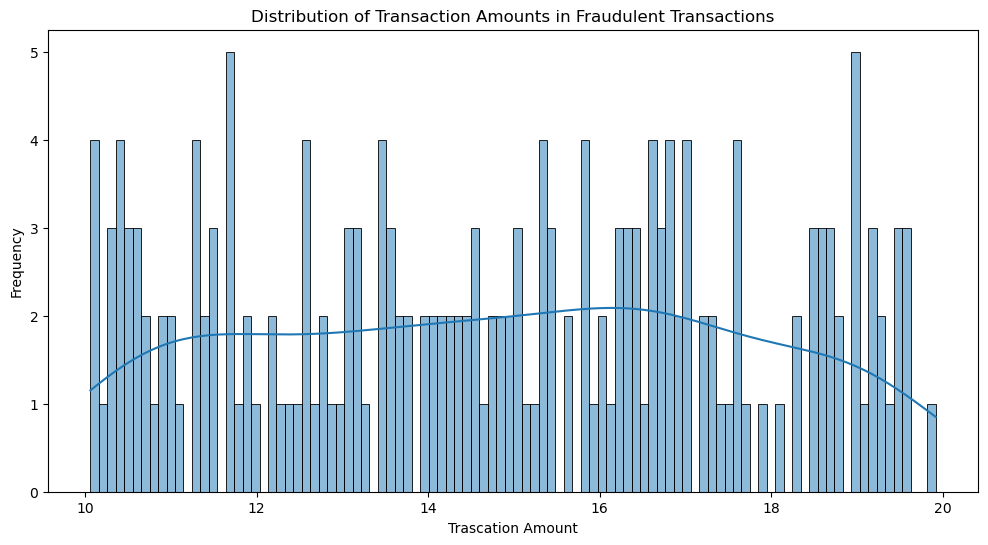

In [42]:
# Plot the distribution of 'FRAUD_AMOUNT' using a histogram
plt.figure(figsize=(12, 6))
sns.histplot(grouped_tx_amounts['TX_AMOUNT'], bins=100, kde=True)
plt.title('Distribution of Transaction Amounts in Fraudulent Transactions')
plt.xlabel('Trascation Amount')
plt.ylabel('Frequency')
plt.show()

In [43]:
unique_alert_ids = df_trct['ALERT_ID'].unique()
print(set(unique_alert_ids))

{1, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 36, 37, 39, 40, 41, 42, 43, 45, 46, 47, 48, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 91, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 140, 141, 142, 145, 146, 147, 149, 150, 151, 152, 154, 155, 157, 160, 161, 165, 166, 167, 169, 170, 172, 173, 174, 176, 178, 179, 181, 182, 183, 185, 186, 188, 189, 190, 192, 193, 194, 196, 197, 198, 199, 200, 202, 203, 205, 206, 208, 209, 210, 211, 212, 213, 214, 216, 218, 220, 224, 225, 226, 227, 228, 229, 230, 233, 235, 236, 237, 238, 239, 241, 242, 244, 245, 246, 248, 249, 252, 253, 254, 255, 257, 258, 259, 260, 262, 263, 265, 266, 267, 268, 269, 270, 271, 273, 274, 275, 277, 278, 279, 280, 282, 283, 284, 286, 287

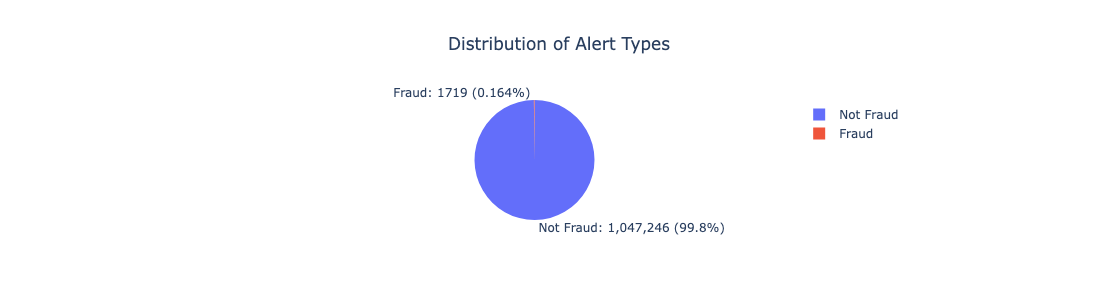

In [351]:
# Create the pie chart
fig = go.Figure(data=[go.Pie(
    labels=['Not Fraud', 'Fraud'],
    values=[fraud_counts.get(0, 0), fraud_counts.get(1, 0)],
    textinfo='percent+value',  # Show both percentage and value
    texttemplate='%{label}: %{value} (%{percent})',  # Format the label text
    textfont_size=12
)])

# Update layout with specific dimensions and centered title
fig.update_layout(
    title_text='Distribution of Alert Types',
    title_x=0.5,  # Center the title
    width=400,  # Set the width of the figure
    height=300  # Set the height of the figure
)

# Display the figure
fig.show()

In [45]:
## not all alert has transactions records
df_trct['IS_FRAUD'].sum()

1329

In [46]:
# df_trct['LOOP'] = False
# df_trct['LOOP_AMOUNT'] = 0
# seen_transactions = set()

# for index, row in df_trct.iterrows():
#     account_id = row['ACCOUNT_ID']
#     tx_amount = row['TX_AMOUNT']
#     if (account_id, tx_amount) in seen_transactions:
#         df_trct.at[index, 'LOOP'] = True
#         df_trct.at[index, 'LOOP_AMOUNT'] = tx_amount
#     else:
#         seen_transactions.add((account_id, tx_amount))

In [47]:
df_trct.info

<bound method DataFrame.info of            TX_ID  SENDER_ACCOUNT_ID  RECEIVER_ACCOUNT_ID   TX_TYPE  TX_AMOUNT  \
0              1               6456                 9069  TRANSFER     465.05   
1              2               7516                 9543  TRANSFER     564.64   
2              3               2445                 9356  TRANSFER     598.94   
3              4               2576                 4617  TRANSFER     466.07   
4              5               3524                 1773  TRANSFER     405.63   
...          ...                ...                  ...       ...        ...   
1048570  1048571               2503                 6452  TRANSFER     413.57   
1048571  1048572               3726                 9223  TRANSFER     198.53   
1048572  1048573               3726                 1469  TRANSFER     198.53   
1048573  1048574               3726                 3708  TRANSFER     198.53   
1048574  1048575               3726                 1321  TRANSFER     198.53

In [48]:
df_trct.sort_values(by = 'RECEIVER_ACCOUNT_ID')

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID
694017,694018,4122,3,TRANSFER,13.63,105,False,-1
242249,242250,4122,3,TRANSFER,13.63,37,False,-1
436000,436001,4122,3,TRANSFER,13.63,66,False,-1
978707,978708,4122,3,TRANSFER,13.63,148,False,-1
1025611,1025612,4122,3,TRANSFER,13.63,155,False,-1
...,...,...,...,...,...,...,...,...
8903,8904,9614,9999,TRANSFER,114.73,1,False,-1
357727,357728,8124,9999,TRANSFER,10.86,54,False,-1
685018,685019,8701,9999,TRANSFER,132.49,104,False,-1
310947,310948,6192,9999,TRANSFER,15.71,47,False,-1


In [49]:
#is every fraud transaction in transaction contained by alert table?
# Filter fraud transactions from the transactions table
fraud_transactions = df_trct[df_trct['IS_FRAUD'] == True]

# Check if each fraud transaction's TX_ID exists in the alerts table
fraud_tx_ids = set(fraud_transactions['TX_ID'])
alert_tx_ids = set(df_alt['TX_ID'])

# Determine if every fraud transaction is in the alerts table
fraud_in_alerts = fraud_tx_ids.issubset(alert_tx_ids)

# Display the result
print("Are all fraud transactions contained in the alerts table?", fraud_in_alerts)

# Optionally, find which fraud transactions are not in the alerts table
missing_fraud_tx_ids = fraud_tx_ids - alert_tx_ids
print("Fraud transactions not in alerts table:", missing_fraud_tx_ids)

Are all fraud transactions contained in the alerts table? True
Fraud transactions not in alerts table: set()


In [50]:
df_trct_alert = pd.merge(df_trct, df_alt, on=['TX_ID','SENDER_ACCOUNT_ID','RECEIVER_ACCOUNT_ID','TX_TYPE','TX_AMOUNT','IS_FRAUD','TIMESTAMP','ALERT_ID'], how='outer')
df_trct_alert.info

<bound method DataFrame.info of            TX_ID  SENDER_ACCOUNT_ID  RECEIVER_ACCOUNT_ID   TX_TYPE  TX_AMOUNT  \
0              1               6456                 9069  TRANSFER     465.05   
1              2               7516                 9543  TRANSFER     564.64   
2              3               2445                 9356  TRANSFER     598.94   
3              4               2576                 4617  TRANSFER     466.07   
4              5               3524                 1773  TRANSFER     405.63   
...          ...                ...                  ...       ...        ...   
1048960  1316271               2465                  707  TRANSFER      16.31   
1048961  1316636               1453                 8709  TRANSFER       2.81   
1048962  1317852               9446                  790  TRANSFER      11.64   
1048963  1322020               6969                 9529  TRANSFER       3.86   
1048964  1322711               8908                 3629  TRANSFER      10.98

In [51]:
df_trct_alert.head()

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID,ALERT_TYPE
0,1,6456,9069,TRANSFER,465.05,0,False,-1,NaN
1,2,7516,9543,TRANSFER,564.64,0,False,-1,NaN
2,3,2445,9356,TRANSFER,598.94,0,False,-1,NaN
3,4,2576,4617,TRANSFER,466.07,0,False,-1,NaN
4,5,3524,1773,TRANSFER,405.63,0,False,-1,NaN


In [52]:
df_trct_alert_fan_in = df_trct_alert[df_trct_alert['ALERT_TYPE'] == 'fan_in']
df_trct_alert_fan_in.sort_values(by='RECEIVER_ACCOUNT_ID')

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID,ALERT_TYPE
130345,130346,9872,113,TRANSFER,2.94,20,True,66,fan_in
143026,143027,5578,113,TRANSFER,2.94,22,True,66,fan_in
168427,168428,4322,113,TRANSFER,2.94,26,True,66,fan_in
156731,156732,9507,113,TRANSFER,2.94,24,True,66,fan_in
1048859,1248581,4219,177,TRANSFER,4.32,188,True,93,fan_in
...,...,...,...,...,...,...,...,...,...
1048903,1279644,5069,9988,TRANSFER,4.75,193,True,16,fan_in
1048650,1106202,2962,9997,TRANSFER,4.80,167,True,0,fan_in
1048632,1091057,9332,9997,TRANSFER,4.83,165,True,0,fan_in
1048611,1077962,9810,9997,TRANSFER,4.20,163,True,0,fan_in


In [53]:
df_trct_alert_cycle = df_trct_alert[df_trct_alert['ALERT_TYPE'] == 'cycle']
df_trct_alert_cycle.sort_values(by='ALERT_ID')

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID,ALERT_TYPE
600799,600800,1670,9721,TRANSFER,17.17,91,True,200,cycle
631292,631293,9118,9989,TRANSFER,17.17,96,True,200,cycle
610221,610222,9057,9118,TRANSFER,17.17,92,True,200,cycle
593437,593438,9721,9057,TRANSFER,17.17,90,True,200,cycle
640795,640796,9989,1670,TRANSFER,17.17,97,True,200,cycle
...,...,...,...,...,...,...,...,...,...
1048593,1062503,9053,5687,TRANSFER,13.63,160,True,399,cycle
1048610,1077827,8680,8959,TRANSFER,13.63,163,True,399,cycle
1048624,1086995,8959,9084,TRANSFER,13.63,164,True,399,cycle
1048584,1055217,9084,9053,TRANSFER,13.63,159,True,399,cycle


In [54]:
#Is accounts in transaction table all contained in account table?
account_ids_set = set(df_acc['ACCOUNT_ID'])
sender_account_ids_set = set(df_trct_alert['SENDER_ACCOUNT_ID'])
receiver_account_ids_set = set(df_trct_alert['RECEIVER_ACCOUNT_ID'])
print("Are the sender account ids all contained in account table?", sender_account_ids_set.issubset(account_ids_set))
print("Are the receiver account ids all contained in account table?", receiver_account_ids_set.issubset(account_ids_set))
print("There are ",len(account_ids_set), "accounts in account table.")
print("There are ",len(sender_account_ids_set), "sender accounts in transaction table.")
print("There are ",len(receiver_account_ids_set), "receiver accounts in transaction table.")

Are the sender account ids all contained in account table? True
Are the receiver account ids all contained in account table? True
There are  10000 accounts in account table.
There are  9999 sender accounts in transaction table.
There are  9914 receiver accounts in transaction table.


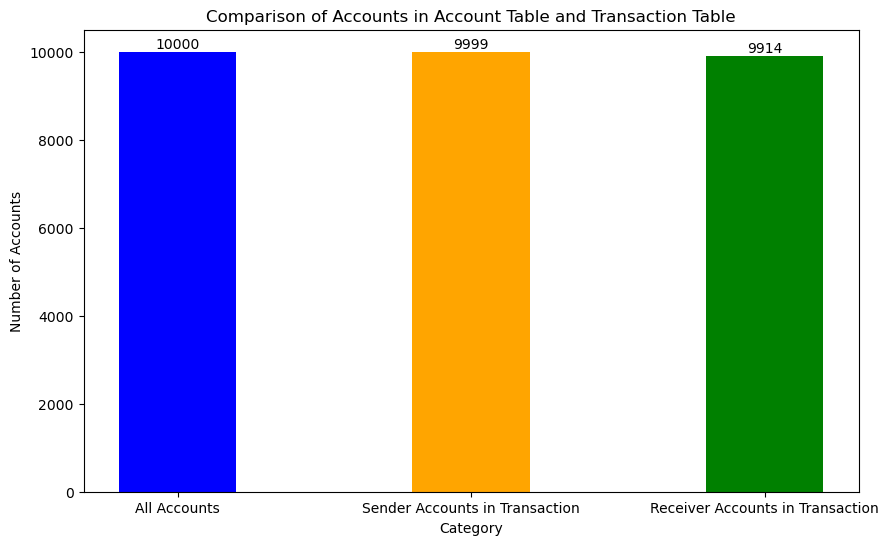

In [55]:
categories = ['All Accounts', 'Sender Accounts in Transaction', 'Receiver Accounts in Transaction']
counts = [len(account_ids_set), len(sender_account_ids_set), len(receiver_account_ids_set)]

# Create the bar chart with slim bars and numbers on top
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=['blue', 'orange', 'green'], width=0.4)
plt.xlabel('Category')
plt.ylabel('Number of Accounts')
plt.title('Comparison of Accounts in Account Table and Transaction Table')

# Add numbers on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

plt.show()

In [56]:
# Create copies of df_acc with prefixes for sender and receiver
df_acc_sender = df_acc.add_prefix('SENDER_')
df_acc_receiver = df_acc.add_prefix('RECEIVER_')

# Merge the transaction table with the sender account information
df_trct_sender = pd.merge(df_trct_alert, df_acc_sender, on='SENDER_ACCOUNT_ID')

# Merge the result with the receiver account information
df_combined = pd.merge(df_trct_sender, df_acc_receiver, on='RECEIVER_ACCOUNT_ID')

df_combined

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID,ALERT_TYPE,SENDER_INIT_BALANCE,SENDER_IS_FRAUD,SENDER_TX_BEHAVIOR_ID,RECEIVER_INIT_BALANCE,RECEIVER_IS_FRAUD,RECEIVER_TX_BEHAVIOR_ID
0,1,6456,9069,TRANSFER,465.05,0,False,-1,NaN,465.06,False,3,132.83,False,1
1,2,7516,9543,TRANSFER,564.64,0,False,-1,NaN,564.64,False,3,493.51,False,3
2,3,2445,9356,TRANSFER,598.94,0,False,-1,NaN,598.94,False,3,274.89,False,2
3,4,2576,4617,TRANSFER,466.07,0,False,-1,NaN,466.08,False,3,164.60,False,4
4,5,3524,1773,TRANSFER,405.63,0,False,-1,NaN,405.63,False,3,196.19,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048960,1316271,2465,707,TRANSFER,16.31,198,True,272,cycle,507.25,True,3,187.75,True,4
1048961,1316636,1453,8709,TRANSFER,2.81,199,True,44,fan_in,572.81,True,3,116.67,True,4
1048962,1317852,9446,790,TRANSFER,11.64,199,True,222,cycle,494.39,True,3,123.18,True,4
1048963,1322020,6969,9529,TRANSFER,3.86,199,True,74,fan_in,354.60,True,5,534.60,True,3


In [57]:
# Assuming 'df' is the DataFrame containing the columns
columns = df_combined.columns.tolist()
sender_columns = [col for col in columns if col.startswith('SENDER_')]
reciver_columns = [col for col in columns if col.startswith('RECEIVER_')]

other_columns = [col for col in columns if not col.startswith('SENDER_') and not col.startswith('RECEIVER_')]

new_order = sender_columns + reciver_columns + other_columns
df_combined = df_combined[new_order]
df_combined

,SENDER_ACCOUNT_ID,SENDER_INIT_BALANCE,SENDER_IS_FRAUD,SENDER_TX_BEHAVIOR_ID,RECEIVER_ACCOUNT_ID,RECEIVER_INIT_BALANCE,RECEIVER_IS_FRAUD,RECEIVER_TX_BEHAVIOR_ID,TX_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID,ALERT_TYPE
0,6456,465.06,False,3,9069,132.83,False,1,1,TRANSFER,465.05,0,False,-1,NaN
1,7516,564.64,False,3,9543,493.51,False,3,2,TRANSFER,564.64,0,False,-1,NaN
2,2445,598.94,False,3,9356,274.89,False,2,3,TRANSFER,598.94,0,False,-1,NaN
3,2576,466.08,False,3,4617,164.60,False,4,4,TRANSFER,466.07,0,False,-1,NaN
4,3524,405.63,False,3,1773,196.19,False,4,5,TRANSFER,405.63,0,False,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048960,2465,507.25,True,3,707,187.75,True,4,1316271,TRANSFER,16.31,198,True,272,cycle
1048961,1453,572.81,True,3,8709,116.67,True,4,1316636,TRANSFER,2.81,199,True,44,fan_in
1048962,9446,494.39,True,3,790,123.18,True,4,1317852,TRANSFER,11.64,199,True,222,cycle
1048963,6969,354.60,True,5,9529,534.60,True,3,1322020,TRANSFER,3.86,199,True,74,fan_in


In [58]:
df_combined[['SENDER_IS_FRAUD','RECEIVER_IS_FRAUD','IS_FRAUD']]

,SENDER_IS_FRAUD,RECEIVER_IS_FRAUD,IS_FRAUD
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1048960,True,True,True
1048961,True,True,True
1048962,True,True,True
1048963,True,True,True


In [59]:
df_different_states = df_combined[
    (df_combined['SENDER_IS_FRAUD'] != df_combined['RECEIVER_IS_FRAUD']) |
    (df_combined['SENDER_IS_FRAUD'] != df_combined['IS_FRAUD']) |
    (df_combined['RECEIVER_IS_FRAUD'] != df_combined['IS_FRAUD'])
]
# Display the filtered dataframe
df_different_states

,SENDER_ACCOUNT_ID,SENDER_INIT_BALANCE,SENDER_IS_FRAUD,SENDER_TX_BEHAVIOR_ID,RECEIVER_ACCOUNT_ID,RECEIVER_INIT_BALANCE,RECEIVER_IS_FRAUD,RECEIVER_TX_BEHAVIOR_ID,TX_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID,ALERT_TYPE
6,7123,136.61,False,1,9711,187.85,True,4,7,TRANSFER,11.38,0,False,-1,NaN
9,7123,136.61,False,1,8957,358.23,True,5,10,TRANSFER,11.38,0,False,-1,NaN
12,7123,136.61,False,1,9915,354.49,True,5,13,TRANSFER,11.38,0,False,-1,NaN
19,6613,162.31,False,4,9975,334.92,True,5,20,TRANSFER,162.30,0,False,-1,NaN
21,6613,162.31,False,4,9998,323.79,True,5,22,TRANSFER,162.30,0,False,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048565,5464,464.19,False,3,9982,383.22,True,5,1048566,TRANSFER,464.19,158,False,-1,NaN
1048566,561,464.13,False,3,7719,188.37,True,4,1048567,TRANSFER,464.13,158,False,-1,NaN
1048567,7867,383.38,True,5,7681,121.21,False,4,1048568,TRANSFER,383.38,158,False,-1,NaN
1048569,4549,450.08,True,3,1437,508.20,False,3,1048570,TRANSFER,450.07,158,False,-1,NaN


In [60]:
df_combined[
    ((df_combined['SENDER_IS_FRAUD'] == True) & (df_combined['RECEIVER_IS_FRAUD'] == True)) 
    & (df_combined['IS_FRAUD'] == True)
]
print("The fraudulent transaction is determinded by both receiver and sender are fraudulent")

The fraudulent transaction is determinded by both receiver and sender are fraudulent


In [61]:
def detect_transaction_chains(df):
    chains = []
    visited = set()

    for _, start_tx in df.iterrows():
        start_sender = start_tx['SENDER_ACCOUNT_ID']
        start_amount = start_tx['TX_AMOUNT']
        current_receiver = start_tx['RECEIVER_ACCOUNT_ID']

        if start_tx['TX_ID'] in visited:
            continue

        chain = [start_tx]
        visited.add(start_tx['TX_ID'])

        while True:
            next_tx = df[(df['SENDER_ACCOUNT_ID'] == current_receiver) & (df['TX_AMOUNT'] == start_amount) & (~df['TX_ID'].isin(visited))]

            if next_tx.empty:
                break

            next_tx = next_tx.iloc[0]
            chain.append(next_tx)
            visited.add(next_tx['TX_ID'])

            if next_tx['RECEIVER_ACCOUNT_ID'] == start_sender:
                chains.append(chain)
                break

            current_receiver = next_tx['RECEIVER_ACCOUNT_ID']

    return chains

# Detect transaction chains
transaction_chains = detect_transaction_chains(df_alt)

# Convert the chains into a DataFrame for display
chain_dfs = [pd.DataFrame(chain) for chain in transaction_chains]
if chain_dfs:
    result_df = pd.concat(chain_dfs).drop_duplicates().reset_index(drop=True)
else:
    result_df = pd.DataFrame()

# Display the result
print(result_df)

     ALERT_ID ALERT_TYPE  IS_FRAUD    TX_ID  SENDER_ACCOUNT_ID  \
0         200      cycle      True   593438               9721   
1         200      cycle      True   610222               9057   
2         200      cycle      True   631293               9118   
3         200      cycle      True   640796               9989   
4         200      cycle      True   600800               1670   
..        ...        ...       ...      ...                ...   
910       399      cycle      True  1055217               9084   
911       399      cycle      True  1062503               9053   
912       399      cycle      True  1090867               5687   
913       399      cycle      True  1077827               8680   
914       399      cycle      True  1086995               8959   

     RECEIVER_ACCOUNT_ID   TX_TYPE  TX_AMOUNT  TIMESTAMP  
0                   9057  TRANSFER      17.17         90  
1                   9118  TRANSFER      17.17         92  
2                   9989  TRAN

In [62]:
# The transaction cycle does not follow the perfect cycle

# Find transactions that exist in df_alt_cycle but not in result_df
diff_df = df_alt_cycle.merge(result_df, on='TX_ID', how='left', indicator=True)
diff_df = diff_df[diff_df['_merge'] == 'left_only'].drop(columns=['_merge'])

# Display the result
diff_df

,ALERT_ID_x,ALERT_TYPE_x,IS_FRAUD_x,TX_ID,SENDER_ACCOUNT_ID_x,RECEIVER_ACCOUNT_ID_x,TX_TYPE_x,TX_AMOUNT_x,TIMESTAMP_x,ALERT_ID_y,ALERT_TYPE_y,IS_FRAUD_y,SENDER_ACCOUNT_ID_y,RECEIVER_ACCOUNT_ID_y,TX_TYPE_y,TX_AMOUNT_y,TIMESTAMP_y
35,207,cycle,True,1293246,1655,8736,TRANSFER,14.85,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,207,cycle,True,1301696,9464,6875,TRANSFER,14.85,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,207,cycle,True,1302178,6598,1655,TRANSFER,14.85,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,222,cycle,True,1285590,8378,91,TRANSFER,11.64,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,222,cycle,True,1317852,9446,790,TRANSFER,11.64,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,231,cycle,True,1312016,3040,1565,TRANSFER,12.14,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,267,cycle,True,22797,690,4204,TRANSFER,16.80,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317,267,cycle,True,22851,4204,4237,TRANSFER,16.80,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318,267,cycle,True,47206,9639,9776,TRANSFER,16.80,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319,267,cycle,True,79587,4237,9639,TRANSFER,16.80,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df_combined = df_combined[
['TX_ID',
 'ALERT_ID',
 'SENDER_ACCOUNT_ID',
 'SENDER_INIT_BALANCE',
 'SENDER_TX_BEHAVIOR_ID',
 'RECEIVER_ACCOUNT_ID',
 'RECEIVER_INIT_BALANCE',
 'RECEIVER_TX_BEHAVIOR_ID',
 'TX_TYPE',
 'TX_AMOUNT',
 'TIMESTAMP',
 'SENDER_IS_FRAUD',
 'RECEIVER_IS_FRAUD',
 'IS_FRAUD',
 'ALERT_TYPE'
 ]]
df_combined

,TX_ID,ALERT_ID,SENDER_ACCOUNT_ID,SENDER_INIT_BALANCE,SENDER_TX_BEHAVIOR_ID,RECEIVER_ACCOUNT_ID,RECEIVER_INIT_BALANCE,RECEIVER_TX_BEHAVIOR_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,SENDER_IS_FRAUD,RECEIVER_IS_FRAUD,IS_FRAUD,ALERT_TYPE
0,1,-1,6456,465.06,3,9069,132.83,1,TRANSFER,465.05,0,False,False,False,NaN
1,2,-1,7516,564.64,3,9543,493.51,3,TRANSFER,564.64,0,False,False,False,NaN
2,3,-1,2445,598.94,3,9356,274.89,2,TRANSFER,598.94,0,False,False,False,NaN
3,4,-1,2576,466.08,3,4617,164.60,4,TRANSFER,466.07,0,False,False,False,NaN
4,5,-1,3524,405.63,3,1773,196.19,4,TRANSFER,405.63,0,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048960,1316271,272,2465,507.25,3,707,187.75,4,TRANSFER,16.31,198,True,True,True,cycle
1048961,1316636,44,1453,572.81,3,8709,116.67,4,TRANSFER,2.81,199,True,True,True,fan_in
1048962,1317852,222,9446,494.39,3,790,123.18,4,TRANSFER,11.64,199,True,True,True,cycle
1048963,1322020,74,6969,354.60,5,9529,534.60,3,TRANSFER,3.86,199,True,True,True,fan_in


In [64]:
df = df_combined.drop(columns=['TX_ID','TX_TYPE','SENDER_INIT_BALANCE', 'RECEIVER_INIT_BALANCE'])

In [65]:
df

,ALERT_ID,SENDER_ACCOUNT_ID,SENDER_TX_BEHAVIOR_ID,RECEIVER_ACCOUNT_ID,RECEIVER_TX_BEHAVIOR_ID,TX_AMOUNT,TIMESTAMP,SENDER_IS_FRAUD,RECEIVER_IS_FRAUD,IS_FRAUD,ALERT_TYPE
0,-1,6456,3,9069,1,465.05,0,False,False,False,NaN
1,-1,7516,3,9543,3,564.64,0,False,False,False,NaN
2,-1,2445,3,9356,2,598.94,0,False,False,False,NaN
3,-1,2576,3,4617,4,466.07,0,False,False,False,NaN
4,-1,3524,3,1773,4,405.63,0,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1048960,272,2465,3,707,4,16.31,198,True,True,True,cycle
1048961,44,1453,3,8709,4,2.81,199,True,True,True,fan_in
1048962,222,9446,3,790,4,11.64,199,True,True,True,cycle
1048963,74,6969,5,9529,3,3.86,199,True,True,True,fan_in


In [257]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.multioutput import MultiOutputClassifier

In [259]:
label_encoder = LabelEncoder()
df['ALERT_TYPE'] = label_encoder.fit_transform(df['ALERT_TYPE'])

# Step 3: Feature selection
features = ['SENDER_ACCOUNT_ID', 'SENDER_TX_BEHAVIOR_ID', 'RECEIVER_ACCOUNT_ID', 
            'RECEIVER_TX_BEHAVIOR_ID', 'TX_AMOUNT', 'TIMESTAMP']
predict = ['SENDER_IS_FRAUD','RECEIVER_IS_FRAUD','IS_FRAUD','ALERT_TYPE']

In [261]:
target_trct = 'IS_FRAUD'

In [263]:
X = df[features]
y = df[target_trct]
at = df['ALERT_TYPE']
sif = df['SENDER_IS_FRAUD']
rif = df['RECEIVER_IS_FRAUD']

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    209420
        True       0.99      0.93      0.96       373

    accuracy                           1.00    209793
   macro avg       1.00      0.97      0.98    209793
weighted avg       1.00      1.00      1.00    209793

F1 Score: 0.9613259668508287


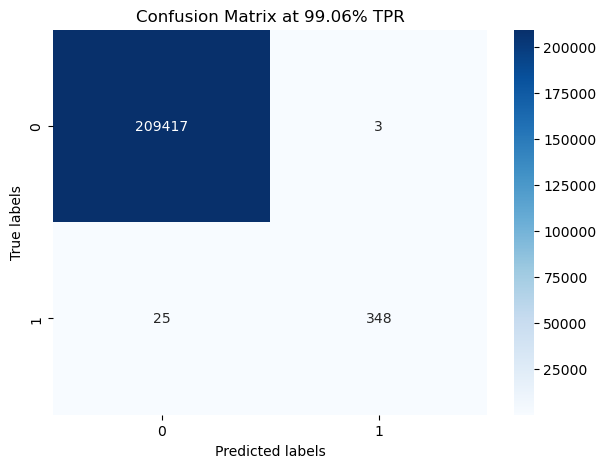

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred))
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix at {tpr*100:.2f}% TPR')
plt.show()

                   Feature  Importance
4                TX_AMOUNT        0.66
1    SENDER_TX_BEHAVIOR_ID        0.14
0        SENDER_ACCOUNT_ID        0.10
5                TIMESTAMP        0.06
2      RECEIVER_ACCOUNT_ID        0.03
3  RECEIVER_TX_BEHAVIOR_ID        0.01


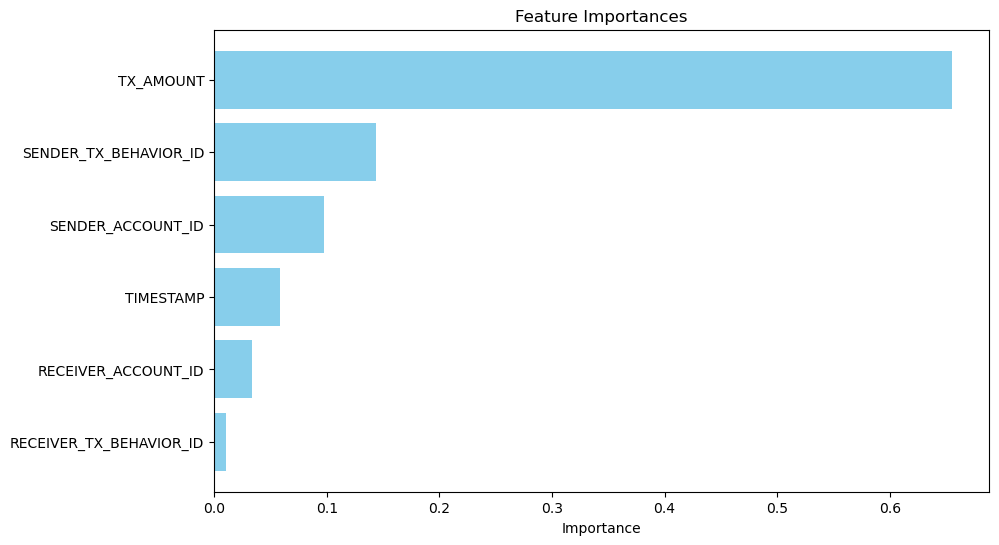

In [115]:
feature_importances = model.feature_importances_

# Step 8: Print out feature importances
feature_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Step 9: Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [249]:
X_train, X_test, at_train, at_test = train_test_split(X, sif, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
sif_pred = model.predict(X_test)
sif_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(sif_test, sif_pred))
tpr = roc_auc_score(sif_test, sif_pred_proba)
print('ROC-AUC Score:', tpr)

cm = confusion_matrix(at_test, at_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix at {tpr*100:.2f}% TPR')
plt.show()

feature_importances = model.feature_importances_

# Step 8: Print out feature importances
feature_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Step 9: Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

TypeError: list indices must be integers or slices, not tuple

In [96]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'max_depth': [4,8,16],
    'eta': [0.1,0.2,0.3],
}

xgb = XGBClassifier(eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=2,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_pred)
print("Test AUC: ", test_auc)


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ...............................eta=0.1, max_depth=4; total time=   0.4s
[CV] END ...............................eta=0.1, max_depth=4; total time=   0.3s
[CV] END ...............................eta=0.1, max_depth=8; total time=   0.5s
[CV] END ...............................eta=0.1, max_depth=8; total time=   0.4s
[CV] END ..............................eta=0.1, max_depth=16; total time=   0.5s
[CV] END ..............................eta=0.1, max_depth=16; total time=   0.5s
[CV] END ...............................eta=0.2, max_depth=4; total time=   0.5s
[CV] END ...............................eta=0.2, max_depth=4; total time=   0.6s
[CV] END ...............................eta=0.2, max_depth=8; total time=   0.6s
[CV] END ...............................eta=0.2, max_depth=8; total time=   0.6s
[CV] END ..............................eta=0.2, max_depth=16; total time=   0.6s
[CV] END ..............................eta=0.2, m

                   Feature  Importance
1    SENDER_TX_BEHAVIOR_ID        0.78
4                TX_AMOUNT        0.11
5                TIMESTAMP        0.08
0        SENDER_ACCOUNT_ID        0.03
2      RECEIVER_ACCOUNT_ID        0.01
3  RECEIVER_TX_BEHAVIOR_ID        0.00


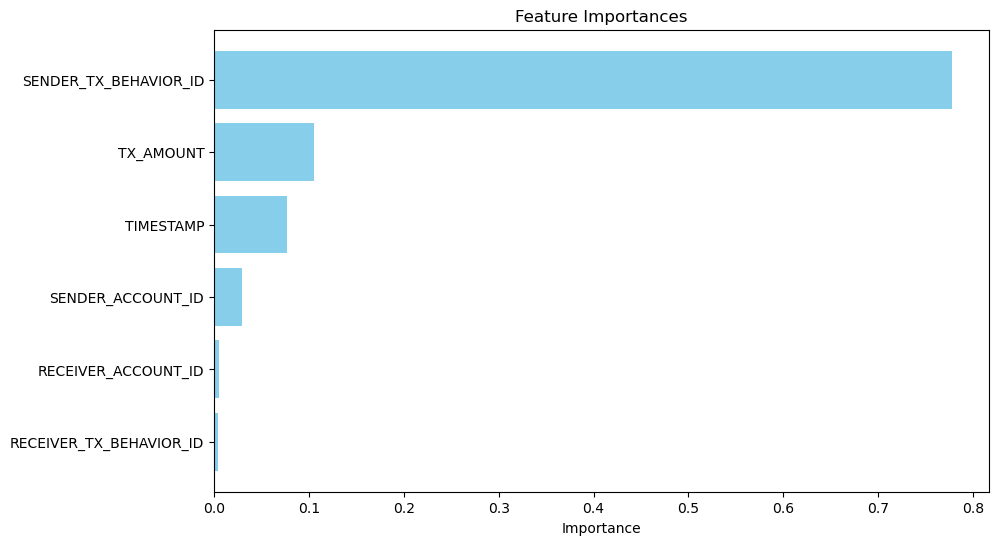

In [119]:

# Step 7: Get feature importances
feature_importances = best_model.feature_importances_

# Step 8: Print out feature importances
feature_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Step 9: Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [103]:
from imblearn.under_sampling import RandomUnderSampler

from collections import Counter

counter = Counter(y)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

rus = RandomUnderSampler(random_state=0)

X_us, y_us = rus.fit_resample(X, y)


counter = Counter(y_us)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_us.shape, y_us.shape)

Class= False, n=1047246 (99.84%)
Class= True, n=1719 (0.16%)
Class= False, n=1719 (0.16%)
Class= True, n=1719 (0.16%)
Upsampled data shape:  (3438, 6) (3438,)


              precision    recall  f1-score   support

       False       0.96      0.99      0.98       361
        True       0.99      0.96      0.97       327

    accuracy                           0.97       688
   macro avg       0.97      0.97      0.97       688
weighted avg       0.97      0.97      0.97       688

ROC-AUC Score: 0.9974840529619559


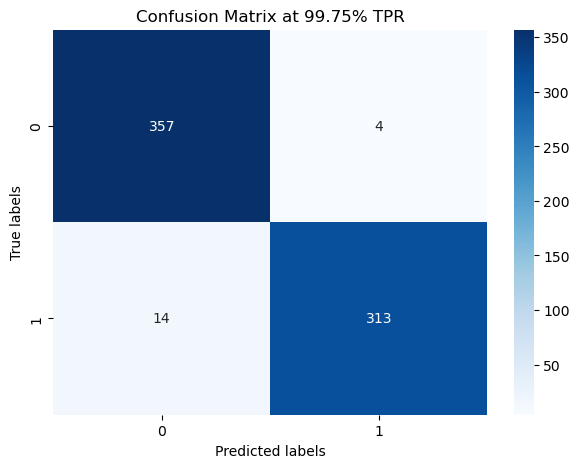

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_us, y_us, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred))
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix at {tpr*100:.2f}% TPR')
plt.show()

In [273]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_os, y_os = oversample.fit_resample(X, y)

counter = Counter(y_os)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_os.shape, y_os.shape)

Class= False, n=1047246 (99.84%)
Class= True, n=1719 (0.16%)
Class= False, n=1047246 (99.84%)
Class= True, n=1047246 (99.84%)
Upsampled data shape:  (2094492, 6) (2094492,)


Execution Time: 39.30 seconds
Precision: 0.9914529914529915
Recall: 0.9329758713136729
F1 Score: 0.9613259668508287
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    209420
        True       0.99      0.93      0.96       373

    accuracy                           1.00    209793
   macro avg       1.00      0.97      0.98    209793
weighted avg       1.00      1.00      1.00    209793

ROC-AUC Score: 0.990568986269495


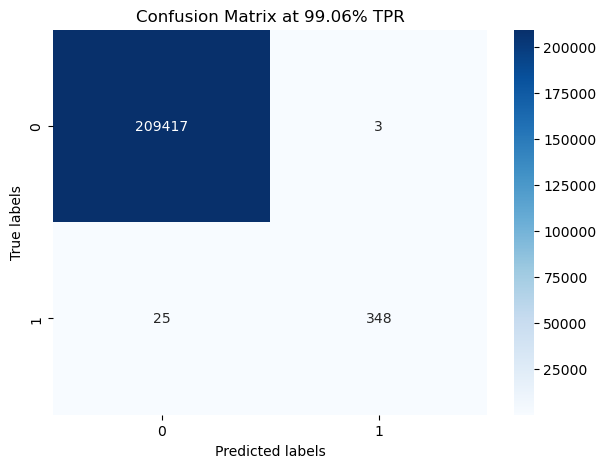

In [371]:
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Start the timer
start_time = time.time()

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Execution Time: {elapsed_time:.2f} seconds")

# Evaluation
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Evaluation
print(classification_report(y_test, y_pred))
tpr = roc_auc_score(y_test, y_pred_proba)
print('ROC-AUC Score:', tpr)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix at {tpr*100:.2f}% TPR')
plt.show()

Execution Time: 20.68 seconds
Precision: 0.9914529914529915
Recall: 0.9329758713136729
F1 Score: 0.9613259668508287
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    209420
        True       0.99      0.93      0.96       373

    accuracy                           1.00    209793
   macro avg       1.00      0.97      0.98    209793
weighted avg       1.00      1.00      1.00    209793

ROC-AUC Score: 0.9879058605114649


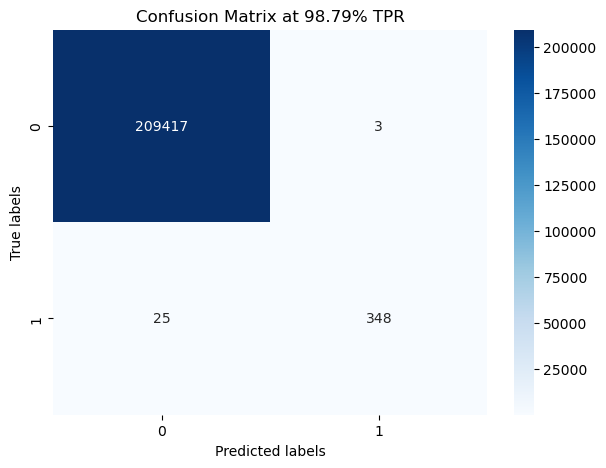

In [373]:
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Start the timer
start_time = time.time()

# Model training
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Execution Time: {elapsed_time:.2f} seconds")

# Evaluation
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Evaluation
print(classification_report(y_test, y_pred))
tpr = roc_auc_score(y_test, y_pred_proba)
print('ROC-AUC Score:', tpr)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix at {tpr*100:.2f}% TPR')
plt.show()

Precision: 0.9914529914529915
Recall: 0.9329758713136729
F1 Score: 0.9613259668508287
Execution Time: 19.30 seconds
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    209420
        True       0.99      0.93      0.96       373

    accuracy                           1.00    209793
   macro avg       1.00      0.97      0.98    209793
weighted avg       1.00      1.00      1.00    209793

ROC-AUC Score: 0.9879009125932648


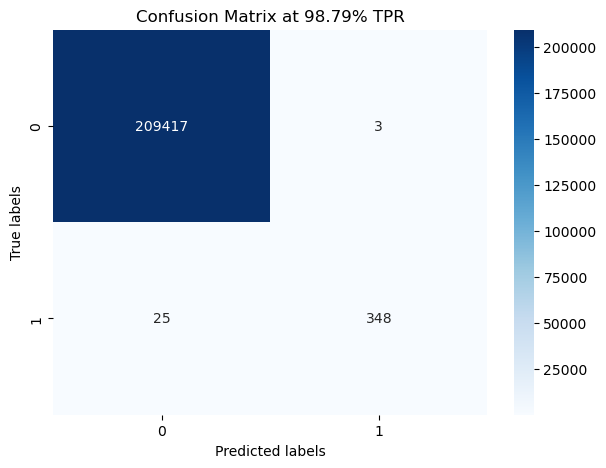

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Start the timer
start_time = time.time()

# Model training
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Execution Time: {elapsed_time:.2f} seconds")

# Evaluation
print(classification_report(y_test, y_pred))
tpr = roc_auc_score(y_test, y_pred_proba)
print('ROC-AUC Score:', tpr)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix at {tpr*100:.2f}% TPR')
plt.show()

Execution Time: 1.12 seconds
Precision: 0.994269340974212
Recall: 0.9302949061662198
F1 Score: 0.961218836565097
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    209420
        True       0.99      0.93      0.96       373

    accuracy                           1.00    209793
   macro avg       1.00      0.97      0.98    209793
weighted avg       1.00      1.00      1.00    209793

ROC-AUC Score: 0.9981480959924295


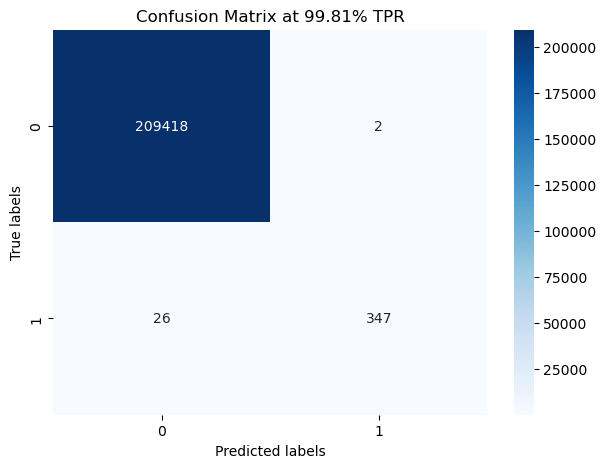

In [367]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Start the timer
start_time = time.time()

# Model training
model = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Execution Time: {elapsed_time:.2f} seconds")

# Evaluation
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Evaluation
print(classification_report(y_test, y_pred))
tpr = roc_auc_score(y_test, y_pred_proba)
print('ROC-AUC Score:', tpr)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix at {tpr*100:.2f}% TPR')
plt.show()

In [211]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [4,8,16],
    'eta': [0.1,0.2,0.3],
}

xgb = XGBClassifier(eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=2,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_pred)
print("Test AUC: ", test_auc)


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ...............................eta=0.1, max_depth=4; total time=   1.0s
[CV] END ...............................eta=0.1, max_depth=4; total time=   1.0s
[CV] END ...............................eta=0.1, max_depth=8; total time=   1.4s
[CV] END ...............................eta=0.1, max_depth=8; total time=   1.1s
[CV] END ..............................eta=0.1, max_depth=16; total time=   1.7s
[CV] END ..............................eta=0.1, max_depth=16; total time=   1.4s
[CV] END ...............................eta=0.2, max_depth=4; total time=   1.2s
[CV] END ...............................eta=0.2, max_depth=4; total time=   1.0s
[CV] END ...............................eta=0.2, max_depth=8; total time=   1.7s
[CV] END ...............................eta=0.2, max_depth=8; total time=   1.3s
[CV] END ..............................eta=0.2, max_depth=16; total time=   1.8s
[CV] END ..............................eta=0.2, m

Epoch 1/10
41890/41890 ━━━━━━━━━━━━━━━━━━━━ 9s 221us/step - accuracy: 0.8526 - loss: 15.8541 - val_accuracy: 0.9081 - val_loss: 0.3061
Epoch 2/10
41890/41890 ━━━━━━━━━━━━━━━━━━━━ 9s 209us/step - accuracy: 0.9065 - loss: 0.5746 - val_accuracy: 0.8779 - val_loss: 1.1353
Epoch 3/10
41890/41890 ━━━━━━━━━━━━━━━━━━━━ 9s 206us/step - accuracy: 0.9122 - loss: 0.5365 - val_accuracy: 0.9283 - val_loss: 0.3462
Epoch 4/10
41890/41890 ━━━━━━━━━━━━━━━━━━━━ 9s 211us/step - accuracy: 0.9152 - loss: 0.4992 - val_accuracy: 0.9457 - val_loss: 0.2344
Epoch 5/10
41890/41890 ━━━━━━━━━━━━━━━━━━━━ 9s 207us/step - accuracy: 0.9177 - loss: 0.4368 - val_accuracy: 0.9467 - val_loss: 0.1639
Epoch 6/10
41890/41890 ━━━━━━━━━━━━━━━━━━━━ 9s 210us/step - accuracy: 0.9186 - loss: 0.3856 - val_accuracy: 0.9335 - val_loss: 0.1560
Epoch 7/10
41890/41890 ━━━━━━━━━━━━━━━━━━━━ 9s 213us/step - accuracy: 0.9212 - loss: 0.3065 - val_accuracy: 0.9174 - val_loss: 0.4192
Epoch 8/10
41890/41890 ━━━━━━━━━━━━━━━━━━━━ 9s 213us/step - a

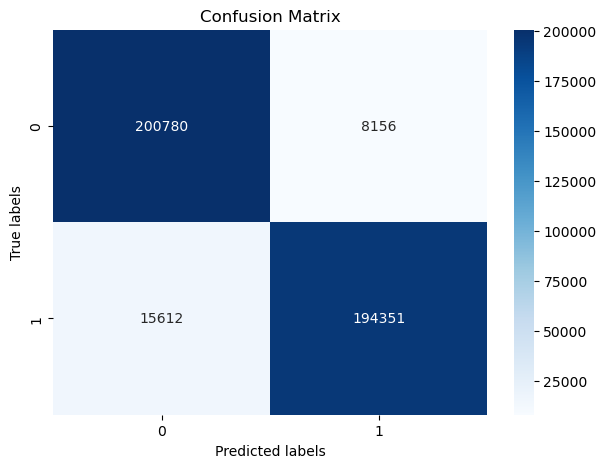

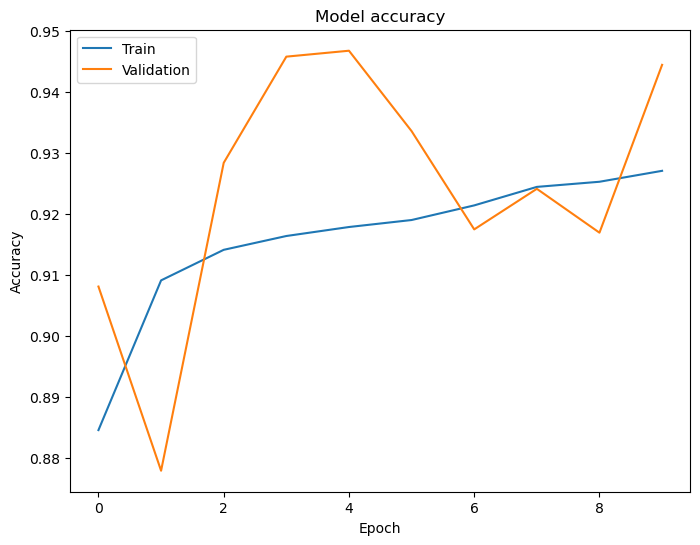

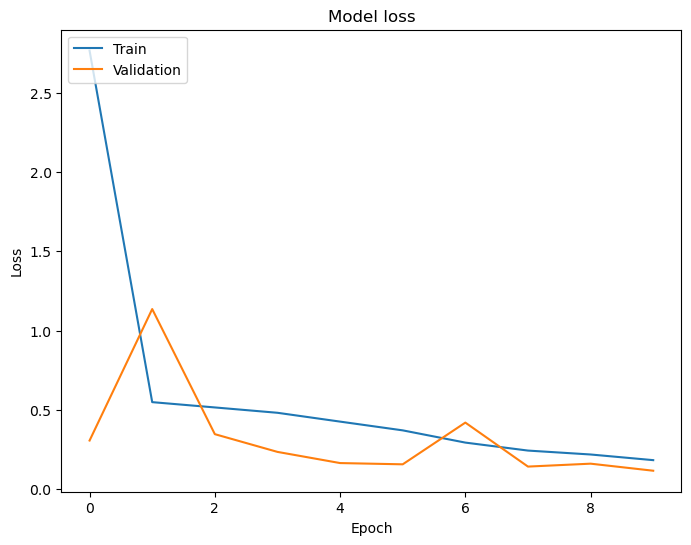

In [205]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size=0.2, random_state=42)
# Build the neural network model
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

trp = roc_auc_score(y_test, y_pred)
print(f"ROC_AUC Score: {trp}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Epoch 1/10
20980/20980 ━━━━━━━━━━━━━━━━━━━━ 5s 207us/step - accuracy: 0.9971 - loss: 0.8338 - val_accuracy: 0.9983 - val_loss: 0.3402
Epoch 2/10
20980/20980 ━━━━━━━━━━━━━━━━━━━━ 4s 207us/step - accuracy: 0.9971 - loss: 0.2433 - val_accuracy: 0.9983 - val_loss: 0.0575
Epoch 3/10
20980/20980 ━━━━━━━━━━━━━━━━━━━━ 4s 203us/step - accuracy: 0.9970 - loss: 0.2417 - val_accuracy: 0.9983 - val_loss: 0.3999
Epoch 4/10
20980/20980 ━━━━━━━━━━━━━━━━━━━━ 5s 220us/step - accuracy: 0.9970 - loss: 0.2099 - val_accuracy: 0.9983 - val_loss: 0.2633
Epoch 5/10
20980/20980 ━━━━━━━━━━━━━━━━━━━━ 4s 205us/step - accuracy: 0.9971 - loss: 0.1896 - val_accuracy: 0.9983 - val_loss: 0.0973
Epoch 6/10
20980/20980 ━━━━━━━━━━━━━━━━━━━━ 4s 211us/step - accuracy: 0.9972 - loss: 0.1495 - val_accuracy: 0.9983 - val_loss: 0.0951
Epoch 7/10
20980/20980 ━━━━━━━━━━━━━━━━━━━━ 4s 210us/step - accuracy: 0.9971 - loss: 0.1340 - val_accuracy: 0.9983 - val_loss: 0.0410
Epoch 8/10
20980/20980 ━━━━━━━━━━━━━━━━━━━━ 4s 203us/step - ac

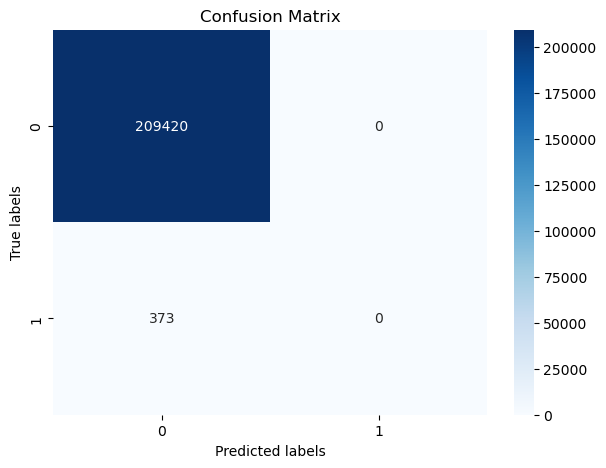

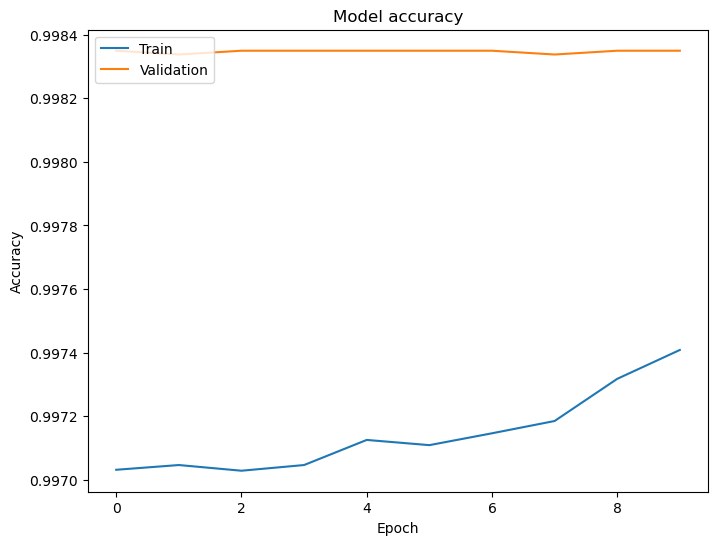

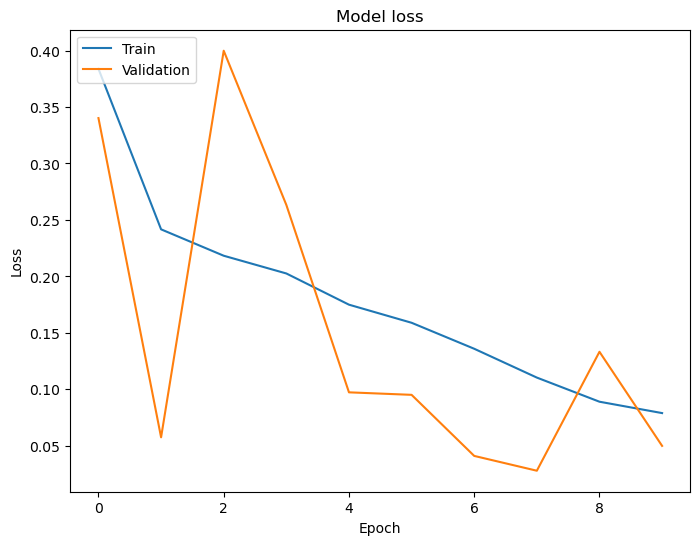

In [209]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Build the neural network model
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

trp = roc_auc_score(y_test, y_pred)
print(f"ROC_AUC Score: {trp}")


# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
y_all = df[predict]

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_all, test_size=0.2, random_state=42)


# Step 5: Scale numerical features
scaler = StandardScaler()

# List of numerical features to scale
numerical_features = ['TX_AMOUNT', 'TIMESTAMP']

# Apply the scaler to the numerical features in the training set
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Apply the scaler to the numerical features in the testing set
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Step 6: Train a Multi-Output Random Forest Classifier
forest = RandomForestClassifier(n_estimators=100, random_state=42)
multi_output_clf = MultiOutputClassifier(forest, n_jobs=-1)
multi_output_clf.fit(X_train, y_train)


In [ ]:
# Evaluate the model
# You can use metrics such as accuracy_score, precision_score, recall_score, f1_score for each target variable
from sklearn.metrics import accuracy_score

for idx, column in enumerate(predict):
    cm = confusion_matrix(y_test[column], y_pred[:, idx])
    accuracy = accuracy_score(y_test[column], y_pred[:, idx])
    
    print(f"\nConfusion Matrix for {column} (Accuracy: {accuracy:.5f}):")

    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix at {accuracy:.5f}% TPR')
    plt.show()

Epoch 1/10
20980/20980 ━━━━━━━━━━━━━━━━━━━━ 9s 378us/step - ALERT_TYPE_accuracy: 0.9969 - IS_FRAUD_accuracy: 0.9971 - RECEIVER_IS_FRAUD_accuracy: 0.6241 - SENDER_IS_FRAUD_accuracy: 0.6823 - loss: 9.4746 - val_ALERT_TYPE_accuracy: 0.9983 - val_IS_FRAUD_accuracy: 0.9983 - val_RECEIVER_IS_FRAUD_accuracy: 0.7487 - val_SENDER_IS_FRAUD_accuracy: 0.7885 - val_loss: 1.1494
Epoch 2/10
20980/20980 ━━━━━━━━━━━━━━━━━━━━ 8s 377us/step - ALERT_TYPE_accuracy: 0.9984 - IS_FRAUD_accuracy: 0.9984 - RECEIVER_IS_FRAUD_accuracy: 0.7255 - SENDER_IS_FRAUD_accuracy: 0.7836 - loss: 1.0983 - val_ALERT_TYPE_accuracy: 0.9983 - val_IS_FRAUD_accuracy: 0.9983 - val_RECEIVER_IS_FRAUD_accuracy: 0.7252 - val_SENDER_IS_FRAUD_accuracy: 0.7885 - val_loss: 1.0707
Epoch 3/10
20980/20980 ━━━━━━━━━━━━━━━━━━━━ 8s 367us/step - ALERT_TYPE_accuracy: 0.9984 - IS_FRAUD_accuracy: 0.9984 - RECEIVER_IS_FRAUD_accuracy: 0.7358 - SENDER_IS_FRAUD_accuracy: 0.7889 - loss: 1.0575 - val_ALERT_TYPE_accuracy: 0.9983 - val_IS_FRAUD_accuracy: 0.

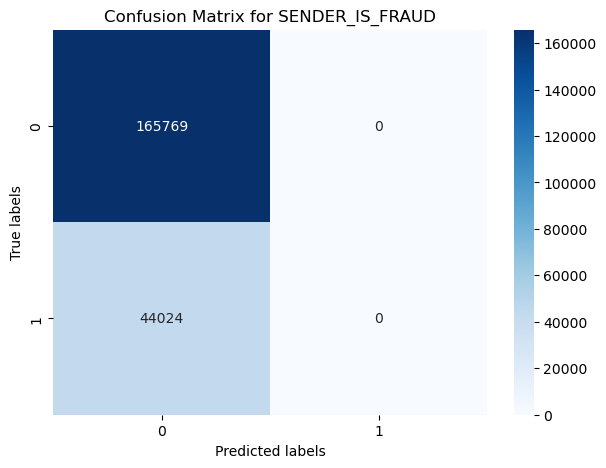


Classification Report for RECEIVER_IS_FRAUD:
              precision    recall  f1-score   support

       False       0.82      0.85      0.84    151300
        True       0.58      0.53      0.55     58493

    accuracy                           0.76    209793
   macro avg       0.70      0.69      0.70    209793
weighted avg       0.76      0.76      0.76    209793



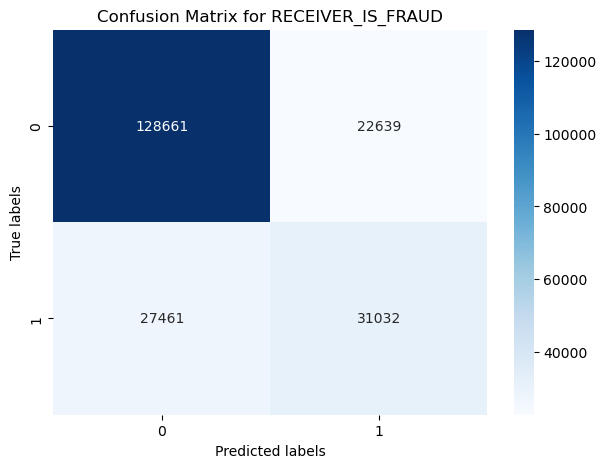


Classification Report for IS_FRAUD:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    209420
        True       0.00      0.00      0.00       373

    accuracy                           1.00    209793
   macro avg       0.50      0.50      0.50    209793
weighted avg       1.00      1.00      1.00    209793



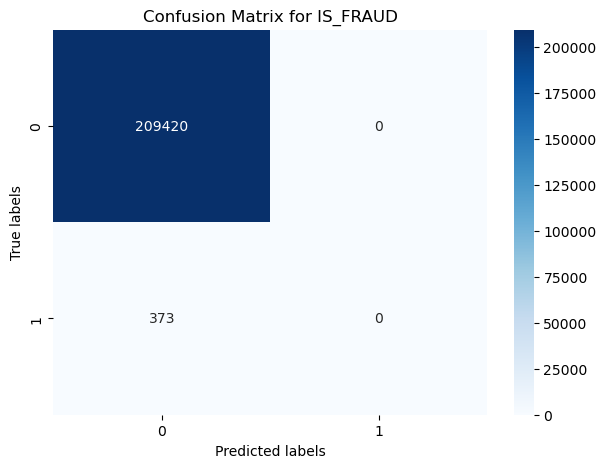


Classification Report for ALERT_TYPE:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       197
           1       0.00      0.00      0.00       176
           2       1.00      1.00      1.00    209420

    accuracy                           1.00    209793
   macro avg       0.33      0.33      0.33    209793
weighted avg       1.00      1.00      1.00    209793



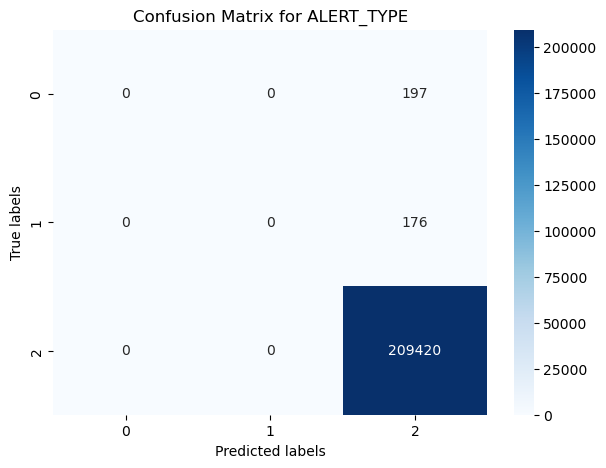


Results for SENDER_IS_FRAUD:
Accuracy: 0.7901550576044005
Precision: 0.6243450150578135
Recall: 0.7901550576044005
F1 Score: 0.6975317723519624
Confusion Matrix:
[[165769      0]
 [ 44024      0]]

Results for RECEIVER_IS_FRAUD:
Accuracy: 0.7611931761307574
Precision: 0.75554090096227
Recall: 0.7611931761307574
F1 Score: 0.757932825208511
Confusion Matrix:
[[128661  22639]
 [ 27461  31032]]

Results for IS_FRAUD:
Accuracy: 0.9982220569799755
Precision: 0.9964472750413333
Recall: 0.9982220569799755
F1 Score: 0.9973338764434617
Confusion Matrix:
[[209420      0]
 [   373      0]]

Results for ALERT_TYPE:
Accuracy: 0.9982220569799755
Precision: 0.9964472750413333
Recall: 0.9982220569799755
F1 Score: 0.9973338764434617
Confusion Matrix:
[[     0      0    197]
 [     0      0    176]
 [     0      0 209420]]


In [251]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded into a DataFrame named `df`
# df = pd.read_csv('your_data.csv') # Use this line to load your actual data

# Step 1: Handle missing values
df['ALERT_TYPE'].fillna('unknown', inplace=True)

# Step 2: Encode categorical features
label_encoder = LabelEncoder()
df['ALERT_TYPE'] = label_encoder.fit_transform(df['ALERT_TYPE'])

# Step 3: Select features and target variables
features = ['SENDER_ACCOUNT_ID', 'RECEIVER_ACCOUNT_ID', 
             'TX_AMOUNT']
predict = ['SENDER_IS_FRAUD', 'RECEIVER_IS_FRAUD', 'IS_FRAUD', 'ALERT_TYPE']

X = df[features]
y = df[predict]

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale numerical features
scaler = StandardScaler()
numerical_features = ['TX_AMOUNT']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Step 6: Build the neural network model
input_layer = Input(shape=(X_train.shape[1],))

# Hidden layers
hidden_layer = Dense(12, activation='relu')(input_layer)

# Output layers
output_sender_fraud = Dense(1, activation='sigmoid', name='SENDER_IS_FRAUD')(hidden_layer)
output_receiver_fraud = Dense(1, activation='sigmoid', name='RECEIVER_IS_FRAUD')(hidden_layer)
output_fraud = Dense(1, activation='sigmoid', name='IS_FRAUD')(hidden_layer)
output_alert_type = Dense(len(df['ALERT_TYPE'].unique()), activation='softmax', name='ALERT_TYPE')(hidden_layer)

# Combine outputs into a model
model = Model(inputs=input_layer, outputs=[output_sender_fraud, output_receiver_fraud, output_fraud, output_alert_type])

# Compile the model
model.compile(optimizer='adam',
              loss={'SENDER_IS_FRAUD': 'binary_crossentropy',
                    'RECEIVER_IS_FRAUD': 'binary_crossentropy',
                    'IS_FRAUD': 'binary_crossentropy',
                    'ALERT_TYPE': 'sparse_categorical_crossentropy'},
              metrics={'SENDER_IS_FRAUD': 'accuracy',
                       'RECEIVER_IS_FRAUD': 'accuracy',
                       'IS_FRAUD': 'accuracy',
                       'ALERT_TYPE': 'accuracy'})

# Step 7: Train the model
history = model.fit(X_train, {'SENDER_IS_FRAUD': y_train['SENDER_IS_FRAUD'],
                              'RECEIVER_IS_FRAUD': y_train['RECEIVER_IS_FRAUD'],
                              'IS_FRAUD': y_train['IS_FRAUD'],
                              'ALERT_TYPE': y_train['ALERT_TYPE']},
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

# Step 8: Make predictions
preds = model.predict(X_test)

# Step 9: Evaluate the model for each output
results = {}

# Calculate metrics for each output
y_pred_sender_fraud = np.round(preds[0])
y_pred_receiver_fraud = np.round(preds[1])
y_pred_fraud = np.round(preds[2])
y_pred_alert_type = np.argmax(preds[3], axis=1)

for target, y_true, y_pred in zip(predict, 
                                  [y_test['SENDER_IS_FRAUD'], y_test['RECEIVER_IS_FRAUD'], y_test['IS_FRAUD'], y_test['ALERT_TYPE']], 
                                  [y_pred_sender_fraud, y_pred_receiver_fraud, y_pred_fraud, y_pred_alert_type]):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    
    results[target] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm
    }
    
    print(f"\nClassification Report for {target}:")

    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1)
    
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {target}')
    plt.show()

# Print the overall accuracy and the accuracy on each output
for target, metrics in results.items():
    print(f"\nResults for {target}:")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Precision: {metrics['precision']}")
    print(f"Recall: {metrics['recall']}")
    print(f"F1 Score: {metrics['f1_score']}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])


Missing values in each column:
ALERT_ID                   0
SENDER_ACCOUNT_ID          0
SENDER_TX_BEHAVIOR_ID      0
RECEIVER_ACCOUNT_ID        0
RECEIVER_TX_BEHAVIOR_ID    0
TX_AMOUNT                  0
TIMESTAMP                  0
SENDER_IS_FRAUD            0
RECEIVER_IS_FRAUD          0
IS_FRAUD                   0
ALERT_TYPE                 0
dtype: int64

Classification Report for SENDER_IS_FRAUD:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00    165769
        True       1.00      0.98      0.99     44024

    accuracy                           0.99    209793
   macro avg       1.00      0.99      0.99    209793
weighted avg       0.99      0.99      0.99    209793



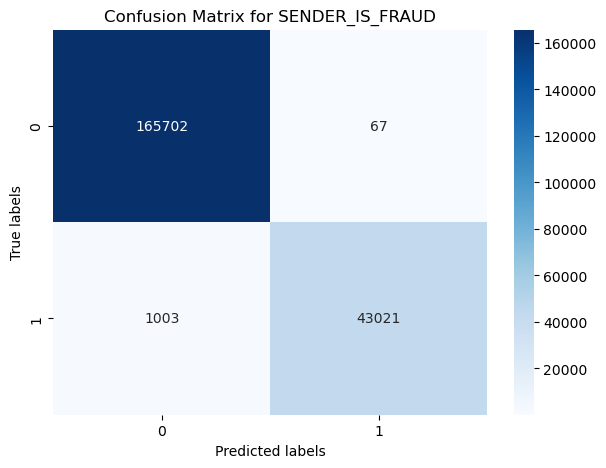


Classification Report for RECEIVER_IS_FRAUD:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00    151300
        True       1.00      0.98      0.99     58493

    accuracy                           0.99    209793
   macro avg       0.99      0.99      0.99    209793
weighted avg       0.99      0.99      0.99    209793



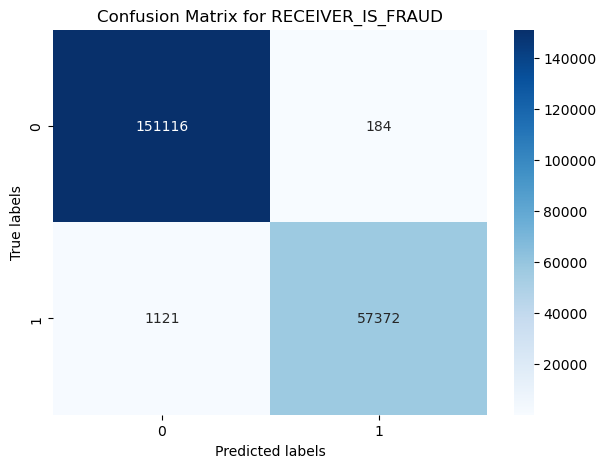


Classification Report for IS_FRAUD:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    209420
        True       0.99      0.94      0.96       373

    accuracy                           1.00    209793
   macro avg       1.00      0.97      0.98    209793
weighted avg       1.00      1.00      1.00    209793



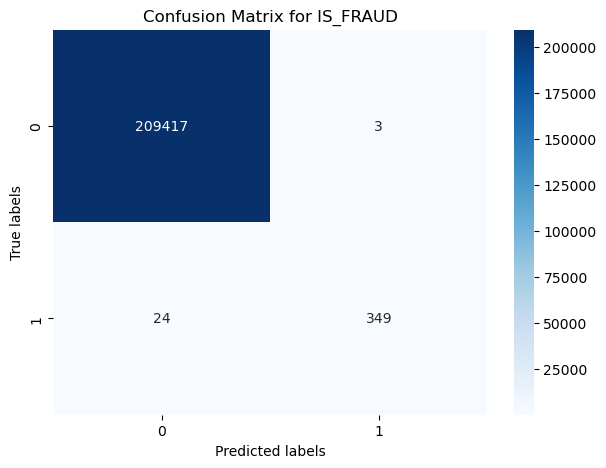


Classification Report for ALERT_TYPE:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       197
           1       0.99      0.99      0.99       176
           2       1.00      1.00      1.00    209420

    accuracy                           1.00    209793
   macro avg       0.99      0.96      0.98    209793
weighted avg       1.00      1.00      1.00    209793



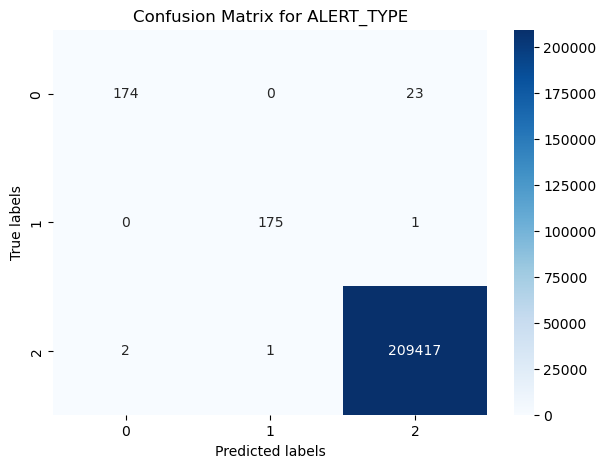

In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded into a DataFrame named `df`
# df = pd.read_csv('your_data.csv') # Use this line to load your actual data

# Fill missing values for 'ALERT_TYPE'
df['ALERT_TYPE'].fillna('unknown', inplace=True)

# Fill or drop other missing values as appropriate
# For simplicity, we drop rows with missing values in this example
df.dropna(inplace=True)

# Step 2: Encode categorical features
label_encoder = LabelEncoder()
df['ALERT_TYPE'] = label_encoder.fit_transform(df['ALERT_TYPE'])

# Step 3: Select features and target variables
features = ['SENDER_ACCOUNT_ID', 'RECEIVER_ACCOUNT_ID', 
            'TX_AMOUNT']
predict = ['SENDER_IS_FRAUD', 'RECEIVER_IS_FRAUD', 'IS_FRAUD', 'ALERT_TYPE']

X = df[features]
y = df[predict]

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale numerical features
scaler = StandardScaler()
numerical_features = ['TX_AMOUNT']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Step 6: Train the RandomForestClassifier with MultiOutputClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
multi_rf = MultiOutputClassifier(rf, n_jobs=-1)
multi_rf.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = multi_rf.predict(X_test)

# Step 8: Evaluate the model for each output
results = {}

# Calculate metrics for each output
for i, target in enumerate(predict):
    y_true = y_test[target]
    y_pred_target = y_pred[:, i]
    
    accuracy = accuracy_score(y_true, y_pred_target)
    precision = precision_score(y_true, y_pred_target, average='weighted')
    recall = recall_score(y_true, y_pred_target, average='weighted')
    f1 = f1_score(y_true, y_pred_target, average='weighted')
    cm = confusion_matrix(y_true, y_pred_target)
    
    results[target] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm
    }
    
    print(f"\nClassification Report for {target}:")
    print(classification_report(y_true, y_pred_target))
    
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {target}')
    plt.show()


In [247]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Assuming the data is already loaded into a DataFrame named `df`
# df = pd.read_csv('your_data.csv') # Use this line to load your actual data

# Fill missing values for 'ALERT_TYPE'
df['ALERT_TYPE'].fillna('unknown', inplace=True)

# Fill or drop other missing values as appropriate
# For simplicity, we drop rows with missing values in this example
df.dropna(inplace=True)

# Encode categorical features
label_encoder = LabelEncoder()
df['ALERT_TYPE'] = label_encoder.fit_transform(df['ALERT_TYPE'])

# Select features and target variables
features = ['SENDER_ACCOUNT_ID', 'SENDER_TX_BEHAVIOR_ID', 'RECEIVER_ACCOUNT_ID', 
            'RECEIVER_TX_BEHAVIOR_ID', 'TX_AMOUNT', 'TIMESTAMP']
predict = ['SENDER_IS_FRAUD', 'RECEIVER_IS_FRAUD', 'IS_FRAUD', 'ALERT_TYPE']

X = df[features]
y = df[predict]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['TX_AMOUNT', 'TIMESTAMP']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Apply SMOTE to handle class imbalance for each target
smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = X_train, {}

for target in predict:
    X_res, y_res = smote.fit_resample(X_train, y_train[target])
    X_train_balanced = X_res
    y_train_balanced[target] = y_res

# Train the XGBClassifier with MultiOutputClassifier
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
multi_xgb = MultiOutputClassifier(xgb, n_jobs=-1)
multi_xgb.fit(X_train_balanced, pd.DataFrame(y_train_balanced))

# Make predictions
y_pred = multi_xgb.predict(X_test)

# Evaluate the model for each output
results = {}

# Calculate metrics for each output
for i, target in enumerate(predict):
    y_true = y_test[target]
    y_pred_target = y_pred[:, i]
    
    accuracy = accuracy_score(y_true, y_pred_target)
    precision = precision_score(y_true, y_pred_target, average='weighted')
    recall = recall_score(y_true, y_pred_target, average='weighted')
    f1 = f1_score(y_true, y_pred_target, average='weighted')
    cm = confusion_matrix(y_true, y_pred_target)
    
    results[target] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm
    }
    
    print(f"\nClassification Report for {target}:")
    print(classification_report(y_true, y_pred_target))
    
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {target}')
    plt.show()

# Print the overall accuracy and the accuracy on each output
for target, metrics in results.items():
    print(f"\nResults for {target}:")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Precision: {metrics['precision']}")
    print(f"Recall: {metrics['recall']}")
    print(f"F1 Score: {metrics['f1_score']}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])


KeyError: "['TIMESTAMP'] not in index"

In [ ]:
X = df[features]
y = df['IS_FRAUD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix')
plt.show()

feature_importances = model.feature_importances_

# Print out feature importances
feature_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Step 9: Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
X = df[features]
y = df['IS_FRAUD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_smote, y_train_smote)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix')
plt.show()

# Feature importances
feature_importances = model.feature_importances_

# Print out feature importances
feature_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

Precision: 0.9998653491653863
Recall: 0.9998665351084164
F1 Score: 0.9998628739668216


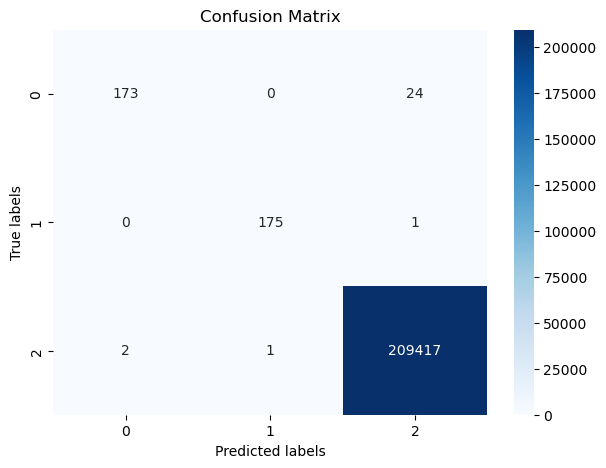

                   Feature  Importance
4                TX_AMOUNT        0.67
5                TIMESTAMP        0.14
1    SENDER_TX_BEHAVIOR_ID        0.10
0        SENDER_ACCOUNT_ID        0.06
2      RECEIVER_ACCOUNT_ID        0.02
3  RECEIVER_TX_BEHAVIOR_ID        0.00


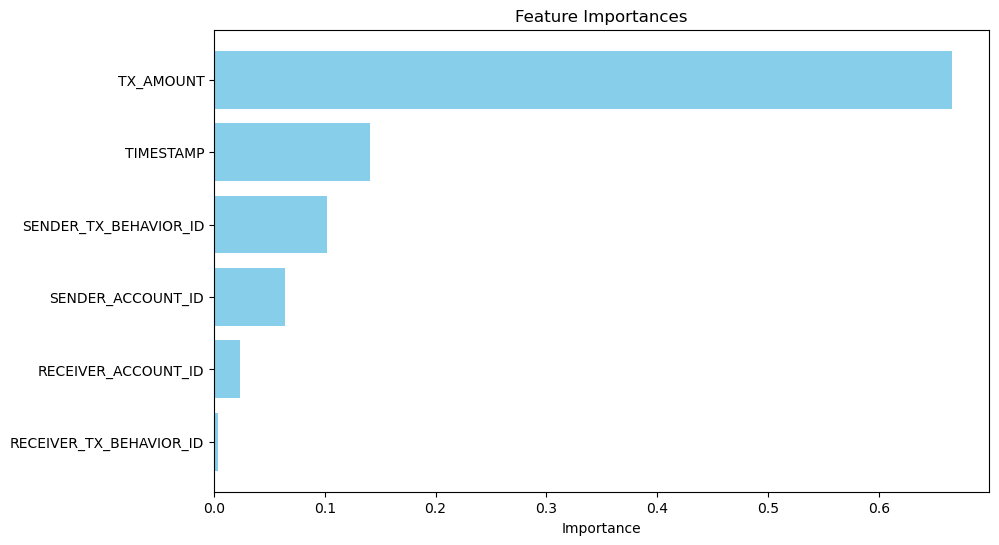

NameError: name 'df3' is not defined

In [375]:
# RandomForestClassifier Alert

X = df[features]
y = df['ALERT_TYPE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix')
plt.show()

feature_importances = model.feature_importances_

# Print out feature importances
feature_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Step 9: Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

X = df3[features3]
y = df['ALERT_TYPE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix')
plt.show()

feature_importances = model.feature_importances_

# Print out feature importances
feature_importances_df = pd.DataFrame({
    'Feature': features3,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Step 9: Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# XGBClassifier Alert

# Start the timer
start_time = time.time()


X = df[features]
y = df['ALERT_TYPE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Execution Time: {elapsed_time:.2f} seconds")

# Evaluation
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix')
plt.show()

feature_importances = model.feature_importances_

# Print out feature importances
feature_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Step 9: Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

X = df3[features3]
y = df['ALERT_TYPE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix')
plt.show()

feature_importances = model.feature_importances_

# Print out feature importances
feature_importances_df = pd.DataFrame({
    'Feature': features3,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Step 9: Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()